In [183]:
# Python imports

import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline
%load_ext autotime

import warnings
warnings.filterwarnings('ignore')

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2021-04-03 17:21:09 -05:00)


# Import and EDA
Importing both the train, test and hidden data sets and combine them into one single dataset. This makes it easy for us to handle if there are any categorical variables only int test dataset. This is only possible because I am working on it after the competition closed. 

In [265]:
df_train = pd.read_csv('train.csv', sep=';')
df_test = pd.read_csv('test.csv', sep=';')
df_test_target = pd.read_csv('leaderboard_test_target.csv', sep = ';')
df = pd.concat([df_train,df_test], ignore_index= True)

time: 4.12 s (started: 2021-04-04 13:12:42 -05:00)


In [185]:
df.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000.0,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000.0,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000.0,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000.0,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000.0,1.0


time: 31 ms (started: 2021-04-03 17:21:13 -05:00)


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307297 entries, 0 to 1307296
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1307297 non-null  object 
 1   DEPTH_MD                           1307297 non-null  float64
 2   X_LOC                              1296463 non-null  float64
 3   Y_LOC                              1296463 non-null  float64
 4   Z_LOC                              1296463 non-null  float64
 5   GROUP                              1306019 non-null  object 
 6   FORMATION                          1163229 non-null  object 
 7   CALI                               1213775 non-null  float64
 8   RSHA                               669747 non-null   float64
 9   RMED                               1267717 non-null  float64
 10  RDEP                               1296223 non-null  float64
 11  RHOB                    

Check for completeness of the cobined dataset

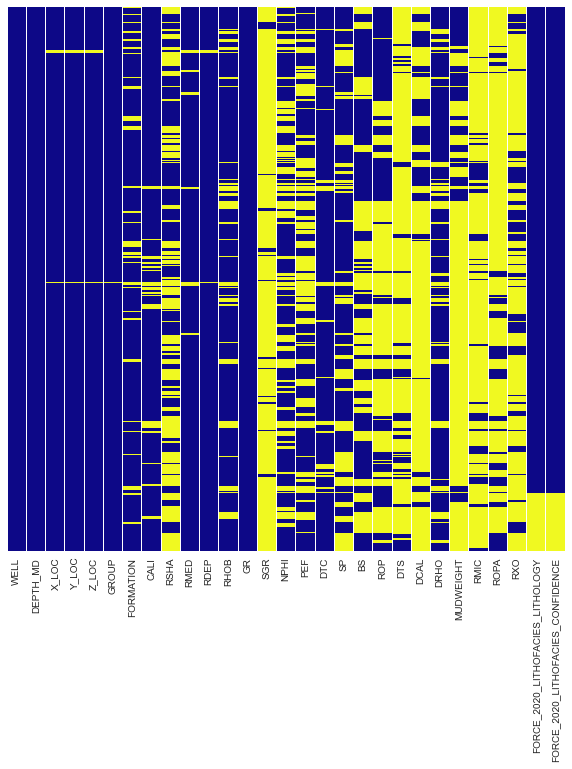

time: 23.3 s (started: 2021-04-03 17:21:13 -05:00)


In [187]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cmap = 'plasma', yticklabels= False, cbar = False)

We can see that some logs like SGR, RSHA, BS, ROP, DTS,DCAL, MUDWEIGHT, RMIC, RXO and ROPA have a lot of missing datapoints.

In [273]:
#Percent of missing data

df.isnull().mean().sort_values(ascending = False)*100

SGR                                  94.694932
RMIC                                 85.659265
DTS                                  83.337145
ROPA                                 81.020763
DCAL                                 76.107342
MUDWEIGHT                            74.265985
RXO                                  72.670709
ROP                                  53.844689
RSHA                                 48.768566
BS                                   42.658707
PEF                                  39.937520
NPHI                                 33.492389
SP                                   28.793992
DRHO                                 15.901819
RHOB                                 13.633398
FORCE_2020_LITHOFACIES_CONFIDENCE    10.476961
FORCE_2020_LITHOFACIES_LITHOLOGY     10.463269
CALI                                  7.153845
DTC                                   6.248465
RMED                                  3.027621
RDEP                                  0.847091
DEPTH_MD     

time: 172 ms (started: 2021-04-04 13:15:18 -05:00)


In [282]:
round(df.SGR.isnull().value_counts()[1]/df.SGR.isnull().count()*100,2)

94.69

time: 32 ms (started: 2021-04-04 13:18:03 -05:00)


As mentioned in the rules for the competition, Depth and GR are the only logs which are available for sure. 
Due to the continous nature of the dataset, for parameters like X,Y,Z, Group, and Formation, it would be a good approximation if we fill the missing sections with the next known non-null value.

In [266]:
df['GROUP'].fillna(method = 'bfill',inplace = True)
df['FORMATION'].fillna(method = 'bfill',inplace = True)

df['X_LOC'].fillna(method = 'bfill',inplace = True)
df['Y_LOC'].fillna(method = 'bfill',inplace = True)
df['Z_LOC'].fillna(method = 'bfill',inplace = True)

time: 109 ms (started: 2021-04-04 13:12:50 -05:00)


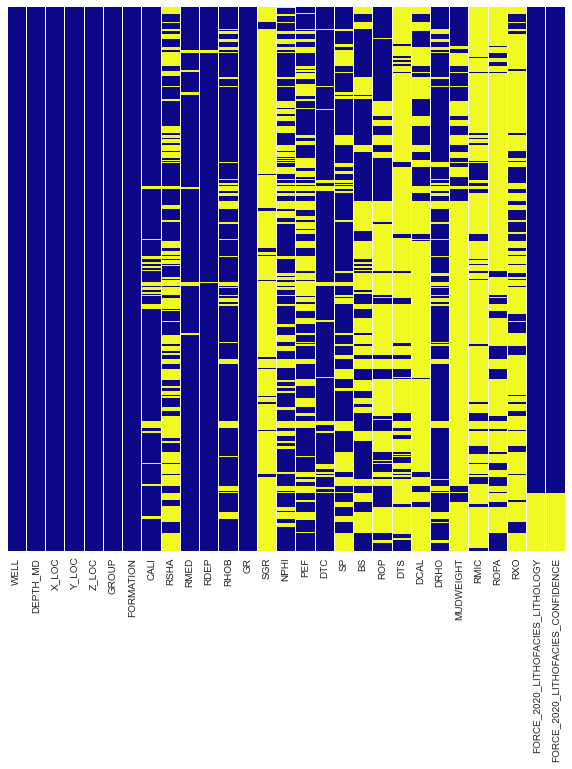

time: 23.6 s (started: 2021-04-03 17:21:37 -05:00)


In [190]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cmap = 'plasma', yticklabels= False, cbar = False)

Lets check if any of the parameters are corelated to each other.

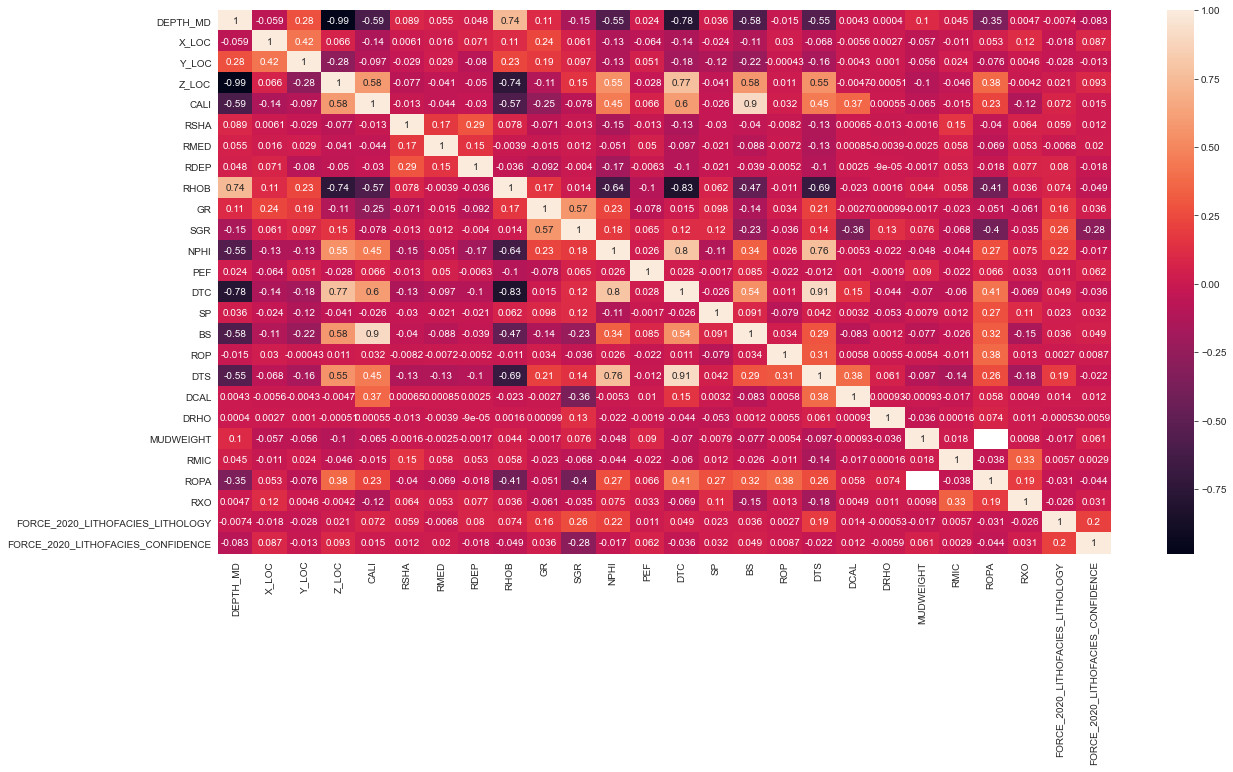

time: 3.09 s (started: 2021-04-03 17:22:00 -05:00)


In [191]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)

We can observe that 
- BS has a high corelation factor with CALI
- DTS has a high corelation factor with DTC
- ROPA has a high corelation factor with MUDWEIGHT

# Log availabilty check per well 

The parameters with more than 30% of data missing might not be very significant in getting accurate preditions. So it would be better to ignore them from this analysis. But before removing from the analysis, lets check if atleast a part of the log is available for most of the wells. If a certain log (even with more than 50% data missing) is available for all the wells, these logs can be imputed and considered for the analysis as they have some value in determining the lithology.

In [289]:
print(f"SGR is available in {len(df.groupby('WELL')['SGR'].count().sort_values(ascending = False)[df.groupby('WELL')['SGR'].count().sort_values(ascending = False)>0])} out of 108 well and has {round(df.SGR.isnull().value_counts()[1]/df.SGR.isnull().count()*100,2)}% of the data missing")
print(f"RMIC is available in {len(df.groupby('WELL')['RMIC'].count().sort_values(ascending = False)[df.groupby('WELL')['RMIC'].count().sort_values(ascending = False)>0])} out of 108 well and has {round(df.RMIC.isnull().value_counts()[1]/df.RMIC.isnull().count()*100,2)}% of the data missing")
print(f"DTS is available in {len(df.groupby('WELL')['DTS'].count().sort_values(ascending = False)[df.groupby('WELL')['DTS'].count().sort_values(ascending = False)>0])} out of 108 well and has {round(df.DTS.isnull().value_counts()[1]/df.DTS.isnull().count()*100,2)}% of the data missing")
print(f"ROPA is available in {len(df.groupby('WELL')['ROPA'].count().sort_values(ascending = False)[df.groupby('WELL')['ROPA'].count().sort_values(ascending = False)>0])} out of 108 well and has {round(df.ROPA.isnull().value_counts()[1]/df.ROPA.isnull().count()*100,2)}% of the data missing")
print(f"DCAL is available in {len(df.groupby('WELL')['DCAL'].count().sort_values(ascending = False)[df.groupby('WELL')['DCAL'].count().sort_values(ascending = False)>0])} out of 108 well and has {round(df.DCAL.isnull().value_counts()[1]/df.DCAL.isnull().count()*100,2)}% of the data missing")
print(f"MUDWEIGHT is available in {len(df.groupby('WELL')['MUDWEIGHT'].count().sort_values(ascending = False)[df.groupby('WELL')['MUDWEIGHT'].count().sort_values(ascending = False)>0])} out of 108 well and has {round(df.MUDWEIGHT.isnull().value_counts()[1]/df.MUDWEIGHT.isnull().count()*100,2)}% of the data missing")
print(f"RXO is available in {len(df.groupby('WELL')['RXO'].count().sort_values(ascending = False)[df.groupby('WELL')['RXO'].count().sort_values(ascending = False)>0])} out of 108 well and has {round(df.RXO.isnull().value_counts()[1]/df.RXO.isnull().count()*100,2)}% of the data missing")
print(f"ROP is available in {len(df.groupby('WELL')['ROP'].count().sort_values(ascending = False)[df.groupby('WELL')['ROP'].count().sort_values(ascending = False)>0])} out of 108 well and has {round(df.ROP.isnull().value_counts()[1]/df.ROP.isnull().count()*100,2)}% of the data missing")
print(f"RSHA is available in {len(df.groupby('WELL')['RSHA'].count().sort_values(ascending = False)[df.groupby('WELL')['RSHA'].count().sort_values(ascending = False)>0])} out of 108 well and has {round(df.RSHA.isnull().value_counts()[1]/df.RSHA.isnull().count()*100,2)}% of the data missing")
print(f"BS is available in {len(df.groupby('WELL')['BS'].count().sort_values(ascending = False)[df.groupby('WELL')['BS'].count().sort_values(ascending = False)>0])} out of 108 well and has {round(df.BS.isnull().value_counts()[1]/df.BS.isnull().count()*100,2)}% of the data missing")
print(f"PEF is available in {len(df.groupby('WELL')['PEF'].count().sort_values(ascending = False)[df.groupby('WELL')['PEF'].count().sort_values(ascending = False)>0])} out of 108 well and has {round(df.PEF.isnull().value_counts()[1]/df.PEF.isnull().count()*100,2)}% of the data missing")
print(f"NPHI is available in {len(df.groupby('WELL')['NPHI'].count().sort_values(ascending = False)[df.groupby('WELL')['NPHI'].count().sort_values(ascending = False)>0])} out of 108 well and has {round(df.NPHI.isnull().value_counts()[1]/df.NPHI.isnull().count()*100,2)}% of the data missing")
print(f"SP is available in {len(df.groupby('WELL')['SP'].count().sort_values(ascending = False)[df.groupby('WELL')['SP'].count().sort_values(ascending = False)>0])} out of 108 well and has {round(df.SP.isnull().value_counts()[1]/df.SP.isnull().count()*100,2)}% of the data missing")

SGR is available in 13 out of 108 well and has 94.69% of the data missing
RMIC is available in 30 out of 108 well and has 85.66% of the data missing
DTS is available in 38 out of 108 well and has 83.34% of the data missing
ROPA is available in 31 out of 108 well and has 81.02% of the data missing
DCAL is available in 24 out of 108 well and has 76.11% of the data missing
MUDWEIGHT is available in 29 out of 108 well and has 74.27% of the data missing
RXO is available in 41 out of 108 well and has 72.67% of the data missing
ROP is available in 59 out of 108 well and has 53.84% of the data missing
RSHA is available in 78 out of 108 well and has 48.77% of the data missing
BS is available in 76 out of 108 well and has 42.66% of the data missing
PEF is available in 79 out of 108 well and has 39.94% of the data missing
NPHI is available in 108 out of 108 well and has 33.49% of the data missing
SP is available in 72 out of 108 well and has 28.79% of the data missing
time: 2.25 s (started: 2021-

Based on the previous null check **SGR, RMIC, DTS, ROPA, DCAL, MUDWEIGHT, RXO, ROP, RSHA** will be removed from the analysis.
**WELL, FORCE_2020_LITHOFACIES_CONFIDENCE, GROUP, and FORMATION** were also removed for an unbiased prediction as these parameters are not always available and have crucial information regarding lithology which needs to be predicted.

In [290]:
df.drop(['SGR', 'RMIC', 'DTS', 'ROPA', 'DCAL', 'MUDWEIGHT', 'RXO', 'RSHA', 'ROP', 
         'WELL','FORCE_2020_LITHOFACIES_CONFIDENCE','GROUP','FORMATION' ],axis = 1, inplace=True)

time: 329 ms (started: 2021-04-04 13:42:11 -05:00)


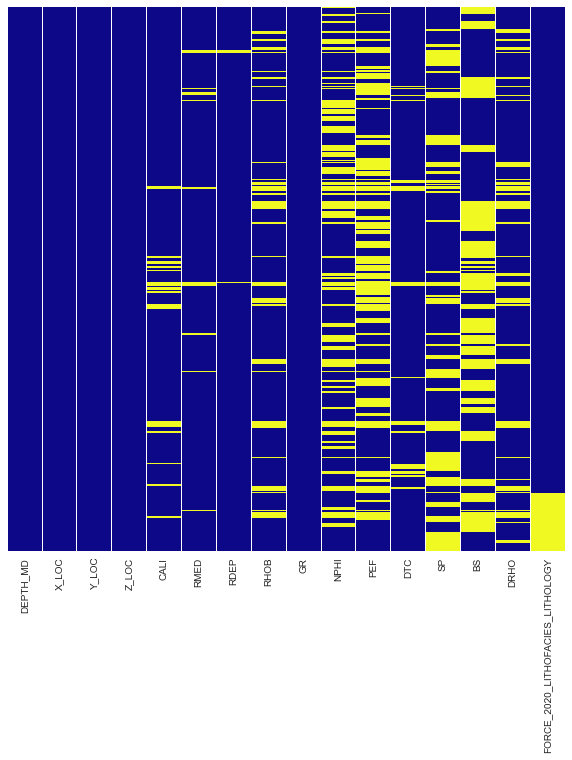

time: 13 s (started: 2021-04-04 13:42:20 -05:00)


In [291]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cmap = 'plasma', yticklabels= False, cbar = False)

# Count plot for the target variable

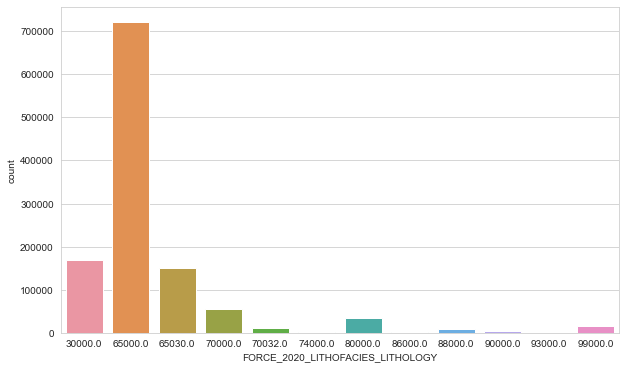

time: 281 ms (started: 2021-04-04 13:42:54 -05:00)


In [292]:
plt.figure(figsize=(10,6))
sns.countplot(df['FORCE_2020_LITHOFACIES_LITHOLOGY'])

Based on the distribution, we can see that the label 65000 (Shale) has very high occurrence. The data is imbalanced so it would be better to consider a stratified kfold distribution for better accuracy and also reduce the bias.

# Building a Pipeline

In [293]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


from sklearn.preprocessing import RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline

# define model pipeline

scaler = RobustScaler()
imputer = IterativeImputer(random_state= 42)

time: 0 ns (started: 2021-04-04 13:42:59 -05:00)


# Processing the hidden dataset

In [313]:
#Processing the same wasy as the original train dataset
df_hidden = pd.read_csv('hidden_test.csv', sep=';')

df_hidden['X_LOC'].fillna(method = 'bfill',inplace = True)
df_hidden['Y_LOC'].fillna(method = 'bfill',inplace = True)
df_hidden['Z_LOC'].fillna(method = 'bfill',inplace = True)

y_hidden = df_hidden.FORCE_2020_LITHOFACIES_LITHOLOGY

df_hidden.drop(['SGR', 'RMIC', 'DTS', 'ROPA', 'DCAL', 'MUDWEIGHT', 'RXO', 'RSHA', 'ROP',
         'WELL','FORCE_2020_LITHOFACIES_CONFIDENCE','FORCE_2020_LITHOFACIES_LITHOLOGY',
         'GROUP','FORMATION' ],axis = 1, inplace=True)

# df_hidden.drop(df_hidden[df_hidden.FORMATION == "EGGA FM (INFORMAL)."].index,inplace = True)

# df_hidden.FORMATION = df_hidden.FORMATION.astype('object')
# df_hidden.GROUP = df_hidden.GROUP.astype('object')


predictions = pipeline.predict(df_hidden)

time: 1.06 s (started: 2021-04-04 16:31:11 -05:00)


# Model Selection based on Balanced accuracy

In [294]:
train_df = df[df.FORCE_2020_LITHOFACIES_LITHOLOGY.notnull()]
test_df = df[df.FORCE_2020_LITHOFACIES_LITHOLOGY.isnull()]

time: 78 ms (started: 2021-04-04 13:43:18 -05:00)


In [349]:
X = train_df.drop('FORCE_2020_LITHOFACIES_LITHOLOGY',axis=1)
y = train_df.FORCE_2020_LITHOFACIES_LITHOLOGY.astype('int')

X_test = test_df.drop('FORCE_2020_LITHOFACIES_LITHOLOGY',axis=1)
y_test = df_test_target.FORCE_2020_LITHOFACIES_LITHOLOGY.astype('int')

time: 219 ms (started: 2021-04-04 22:27:46 -05:00)


In [296]:
# Logistic Regression
model = LogisticRegression()
pipeline = Pipeline(steps=[('s',scaler),('i', imputer), ('m', model)])

scores = cross_validate(pipeline, X, y, cv = 5, scoring = ('balanced_accuracy'))
print("Cross-validated Balanced accuracy score for Logistic Classifier: ",np.average(scores.get('test_score')))

Cross-validated Balanced accuracy score for Logistic Classifier:  0.17203363131793306
time: 14min 34s (started: 2021-04-04 13:43:34 -05:00)


In [297]:
# Random Forest 
model = RandomForestClassifier(random_state = 42, n_jobs= -1)
pipeline = Pipeline(steps=[('s',scaler),('i', imputer), ('m', model)])

scores = cross_validate(pipeline, X, y, cv = 5, scoring = ('balanced_accuracy'))
print("Cross-validated Balanced accuracy score for Random Forest Classifier: ",np.average(scores.get('test_score')))

Cross-validated Balanced accuracy score for Random Forest Classifier:  0.3330279189442865
time: 11min (started: 2021-04-04 13:58:08 -05:00)


In [259]:
# # Gradient Boosting Regressor
# model = GradientBoostingClassifier(random_state=42)
# pipeline = Pipeline(steps=[('s',scaler),('i', imputer), ('m', model)])

# scores = cross_validate(pipeline, X, y, cv = 5, scoring = ('balanced_accuracy'))
# print("Cross-validated Balanced accuracy score for Gradient Boosting Classifier: ",np.average(scores.get('test_score')))

time: 0 ns (started: 2021-04-04 13:07:10 -05:00)


In [ ]:
# # Adaboost
# model = AdaBoostClassifier(random_state=42)
# pipeline = Pipeline(steps=[('s',scaler),('i', imputer), ('m', model)])

# scores = cross_validate(pipeline, X, y, cv = 5, scoring = ('balanced_accuracy'))
# print("Cross-validated Balanced accuracy score for AdaBoost Classifier: ",np.average(scores.get('test_score')))

In [298]:
# XG Boost
model = XGBClassifier(random_state = 42, n_jobs= -1)
pipeline = Pipeline(steps=[('s',scaler),('i', imputer), ('m', model)])

scores = cross_validate(pipeline, X, y, cv = 5, scoring = ('balanced_accuracy'))
print("Cross-validated Balanced accuracy score for XG Boost Classifier: ",np.average(scores.get('test_score')))

[14:10:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:17:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:25:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:33:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_

In [299]:
# Light GBM
model = LGBMClassifier(random_state=42, n_jobs=-1)
pipeline = Pipeline(steps=[('s',scaler),('i', imputer), ('m', model)])

scores = cross_validate(pipeline, X, y, cv = 5, scoring = ('balanced_accuracy'))
print("Cross-validated Balanced accuracy score for Light GBM Classifier: ",np.average(scores.get('test_score')))

Cross-validated Balanced accuracy score for Light GBM Classifier:  0.21784176770840205
time: 10min 10s (started: 2021-04-04 14:50:11 -05:00)


In [300]:
# Catboost
model = CatBoostClassifier(random_state=42)
pipeline = Pipeline(steps=[('s',scaler),('i', imputer), ('m', model)])

scores = cross_validate(pipeline, X, y, cv = 5, scoring = ('balanced_accuracy'))
print("Cross-validated Balanced accuracy score for Catboost Classifier: ",np.average(scores.get('test_score')))

Learning rate set to 0.112168
0:	learn: 1.8744309	total: 884ms	remaining: 14m 42s
1:	learn: 1.6298029	total: 1.69s	remaining: 14m 4s
2:	learn: 1.4664763	total: 2.48s	remaining: 13m 43s
3:	learn: 1.3480663	total: 3.33s	remaining: 13m 50s
4:	learn: 1.2502735	total: 4.14s	remaining: 13m 44s
5:	learn: 1.1746256	total: 4.96s	remaining: 13m 41s
6:	learn: 1.1074987	total: 5.78s	remaining: 13m 40s
7:	learn: 1.0558625	total: 6.62s	remaining: 13m 40s
8:	learn: 1.0092704	total: 7.45s	remaining: 13m 39s
9:	learn: 0.9650442	total: 8.3s	remaining: 13m 41s
10:	learn: 0.9268628	total: 9.07s	remaining: 13m 35s
11:	learn: 0.8953302	total: 9.86s	remaining: 13m 32s
12:	learn: 0.8681092	total: 10.6s	remaining: 13m 28s
13:	learn: 0.8416632	total: 11.4s	remaining: 13m 25s
14:	learn: 0.8221537	total: 12.2s	remaining: 13m 23s
15:	learn: 0.8039889	total: 13.1s	remaining: 13m 27s
16:	learn: 0.7837887	total: 14s	remaining: 13m 31s
17:	learn: 0.7660470	total: 14.8s	remaining: 13m 29s
18:	learn: 0.7500197	total: 15

154:	learn: 0.4103102	total: 2m 5s	remaining: 11m 25s
155:	learn: 0.4094311	total: 2m 6s	remaining: 11m 24s
156:	learn: 0.4088685	total: 2m 7s	remaining: 11m 23s
157:	learn: 0.4081815	total: 2m 8s	remaining: 11m 22s
158:	learn: 0.4075215	total: 2m 8s	remaining: 11m 21s
159:	learn: 0.4066783	total: 2m 9s	remaining: 11m 21s
160:	learn: 0.4059572	total: 2m 10s	remaining: 11m 20s
161:	learn: 0.4054855	total: 2m 11s	remaining: 11m 19s
162:	learn: 0.4045494	total: 2m 12s	remaining: 11m 18s
163:	learn: 0.4038568	total: 2m 13s	remaining: 11m 18s
164:	learn: 0.4030711	total: 2m 13s	remaining: 11m 17s
165:	learn: 0.4026046	total: 2m 14s	remaining: 11m 16s
166:	learn: 0.4014804	total: 2m 15s	remaining: 11m 15s
167:	learn: 0.4009130	total: 2m 16s	remaining: 11m 15s
168:	learn: 0.4003642	total: 2m 17s	remaining: 11m 14s
169:	learn: 0.3995889	total: 2m 17s	remaining: 11m 13s
170:	learn: 0.3988656	total: 2m 18s	remaining: 11m 12s
171:	learn: 0.3974473	total: 2m 19s	remaining: 11m 11s
172:	learn: 0.39

306:	learn: 0.3373109	total: 4m 7s	remaining: 9m 19s
307:	learn: 0.3369090	total: 4m 8s	remaining: 9m 18s
308:	learn: 0.3365255	total: 4m 9s	remaining: 9m 17s
309:	learn: 0.3362936	total: 4m 10s	remaining: 9m 16s
310:	learn: 0.3361089	total: 4m 11s	remaining: 9m 16s
311:	learn: 0.3356161	total: 4m 11s	remaining: 9m 15s
312:	learn: 0.3350363	total: 4m 12s	remaining: 9m 14s
313:	learn: 0.3348884	total: 4m 13s	remaining: 9m 13s
314:	learn: 0.3345110	total: 4m 14s	remaining: 9m 12s
315:	learn: 0.3341631	total: 4m 15s	remaining: 9m 12s
316:	learn: 0.3339755	total: 4m 15s	remaining: 9m 11s
317:	learn: 0.3337500	total: 4m 16s	remaining: 9m 10s
318:	learn: 0.3336036	total: 4m 17s	remaining: 9m 9s
319:	learn: 0.3334897	total: 4m 18s	remaining: 9m 8s
320:	learn: 0.3332021	total: 4m 19s	remaining: 9m 8s
321:	learn: 0.3328835	total: 4m 19s	remaining: 9m 7s
322:	learn: 0.3326389	total: 4m 20s	remaining: 9m 6s
323:	learn: 0.3322388	total: 4m 21s	remaining: 9m 5s
324:	learn: 0.3320912	total: 4m 22s	r

459:	learn: 0.3017862	total: 6m 11s	remaining: 7m 16s
460:	learn: 0.3017098	total: 6m 12s	remaining: 7m 15s
461:	learn: 0.3013840	total: 6m 13s	remaining: 7m 14s
462:	learn: 0.3012794	total: 6m 13s	remaining: 7m 13s
463:	learn: 0.3010157	total: 6m 14s	remaining: 7m 12s
464:	learn: 0.3007067	total: 6m 15s	remaining: 7m 11s
465:	learn: 0.3005802	total: 6m 16s	remaining: 7m 11s
466:	learn: 0.3002870	total: 6m 17s	remaining: 7m 10s
467:	learn: 0.3001567	total: 6m 17s	remaining: 7m 9s
468:	learn: 0.3000898	total: 6m 18s	remaining: 7m 8s
469:	learn: 0.2998409	total: 6m 19s	remaining: 7m 8s
470:	learn: 0.2996581	total: 6m 20s	remaining: 7m 7s
471:	learn: 0.2994753	total: 6m 21s	remaining: 7m 6s
472:	learn: 0.2992570	total: 6m 21s	remaining: 7m 5s
473:	learn: 0.2990626	total: 6m 22s	remaining: 7m 4s
474:	learn: 0.2989825	total: 6m 23s	remaining: 7m 4s
475:	learn: 0.2989152	total: 6m 24s	remaining: 7m 3s
476:	learn: 0.2987765	total: 6m 25s	remaining: 7m 2s
477:	learn: 0.2983775	total: 6m 26s	re

612:	learn: 0.2774339	total: 8m 15s	remaining: 5m 12s
613:	learn: 0.2773205	total: 8m 15s	remaining: 5m 11s
614:	learn: 0.2772155	total: 8m 16s	remaining: 5m 10s
615:	learn: 0.2771424	total: 8m 17s	remaining: 5m 10s
616:	learn: 0.2769371	total: 8m 18s	remaining: 5m 9s
617:	learn: 0.2767588	total: 8m 19s	remaining: 5m 8s
618:	learn: 0.2766156	total: 8m 19s	remaining: 5m 7s
619:	learn: 0.2765659	total: 8m 20s	remaining: 5m 6s
620:	learn: 0.2763488	total: 8m 21s	remaining: 5m 6s
621:	learn: 0.2762359	total: 8m 22s	remaining: 5m 5s
622:	learn: 0.2761593	total: 8m 23s	remaining: 5m 4s
623:	learn: 0.2759975	total: 8m 24s	remaining: 5m 3s
624:	learn: 0.2758562	total: 8m 24s	remaining: 5m 2s
625:	learn: 0.2757484	total: 8m 25s	remaining: 5m 2s
626:	learn: 0.2756445	total: 8m 26s	remaining: 5m 1s
627:	learn: 0.2755581	total: 8m 27s	remaining: 5m
628:	learn: 0.2753711	total: 8m 28s	remaining: 4m 59s
629:	learn: 0.2752635	total: 8m 29s	remaining: 4m 58s
630:	learn: 0.2750924	total: 8m 29s	remaini

765:	learn: 0.2602752	total: 10m 19s	remaining: 3m 9s
766:	learn: 0.2602137	total: 10m 20s	remaining: 3m 8s
767:	learn: 0.2601504	total: 10m 21s	remaining: 3m 7s
768:	learn: 0.2600526	total: 10m 21s	remaining: 3m 6s
769:	learn: 0.2600055	total: 10m 22s	remaining: 3m 5s
770:	learn: 0.2599197	total: 10m 23s	remaining: 3m 5s
771:	learn: 0.2598750	total: 10m 24s	remaining: 3m 4s
772:	learn: 0.2597888	total: 10m 25s	remaining: 3m 3s
773:	learn: 0.2596642	total: 10m 25s	remaining: 3m 2s
774:	learn: 0.2595764	total: 10m 26s	remaining: 3m 1s
775:	learn: 0.2594847	total: 10m 27s	remaining: 3m 1s
776:	learn: 0.2593503	total: 10m 28s	remaining: 3m
777:	learn: 0.2591608	total: 10m 29s	remaining: 2m 59s
778:	learn: 0.2590428	total: 10m 30s	remaining: 2m 58s
779:	learn: 0.2589244	total: 10m 30s	remaining: 2m 57s
780:	learn: 0.2588183	total: 10m 31s	remaining: 2m 57s
781:	learn: 0.2587342	total: 10m 32s	remaining: 2m 56s
782:	learn: 0.2586798	total: 10m 33s	remaining: 2m 55s
783:	learn: 0.2586270	tot

916:	learn: 0.2474147	total: 12m 23s	remaining: 1m 7s
917:	learn: 0.2473534	total: 12m 24s	remaining: 1m 6s
918:	learn: 0.2472772	total: 12m 25s	remaining: 1m 5s
919:	learn: 0.2472502	total: 12m 26s	remaining: 1m 4s
920:	learn: 0.2472110	total: 12m 26s	remaining: 1m 4s
921:	learn: 0.2471742	total: 12m 27s	remaining: 1m 3s
922:	learn: 0.2471393	total: 12m 28s	remaining: 1m 2s
923:	learn: 0.2470886	total: 12m 29s	remaining: 1m 1s
924:	learn: 0.2470199	total: 12m 30s	remaining: 1m
925:	learn: 0.2469446	total: 12m 31s	remaining: 1m
926:	learn: 0.2468837	total: 12m 31s	remaining: 59.2s
927:	learn: 0.2467595	total: 12m 32s	remaining: 58.4s
928:	learn: 0.2467179	total: 12m 33s	remaining: 57.6s
929:	learn: 0.2466074	total: 12m 34s	remaining: 56.8s
930:	learn: 0.2464870	total: 12m 35s	remaining: 56s
931:	learn: 0.2463519	total: 12m 35s	remaining: 55.1s
932:	learn: 0.2463046	total: 12m 36s	remaining: 54.3s
933:	learn: 0.2461710	total: 12m 37s	remaining: 53.5s
934:	learn: 0.2460932	total: 12m 38s

70:	learn: 0.4912988	total: 1m 1s	remaining: 13m 30s
71:	learn: 0.4881570	total: 1m 2s	remaining: 13m 28s
72:	learn: 0.4864316	total: 1m 3s	remaining: 13m 27s
73:	learn: 0.4849219	total: 1m 4s	remaining: 13m 26s
74:	learn: 0.4829763	total: 1m 5s	remaining: 13m 26s
75:	learn: 0.4807685	total: 1m 6s	remaining: 13m 28s
76:	learn: 0.4783167	total: 1m 7s	remaining: 13m 29s
77:	learn: 0.4758825	total: 1m 8s	remaining: 13m 29s
78:	learn: 0.4742447	total: 1m 9s	remaining: 13m 29s
79:	learn: 0.4728036	total: 1m 10s	remaining: 13m 30s
80:	learn: 0.4708029	total: 1m 11s	remaining: 13m 28s
81:	learn: 0.4693717	total: 1m 12s	remaining: 13m 26s
82:	learn: 0.4678428	total: 1m 12s	remaining: 13m 24s
83:	learn: 0.4659383	total: 1m 13s	remaining: 13m 21s
84:	learn: 0.4645535	total: 1m 14s	remaining: 13m 19s
85:	learn: 0.4620274	total: 1m 15s	remaining: 13m 18s
86:	learn: 0.4603879	total: 1m 15s	remaining: 13m 17s
87:	learn: 0.4586505	total: 1m 16s	remaining: 13m 15s
88:	learn: 0.4570206	total: 1m 17s	re

221:	learn: 0.3475997	total: 2m 56s	remaining: 10m 16s
222:	learn: 0.3467903	total: 2m 56s	remaining: 10m 15s
223:	learn: 0.3462632	total: 2m 57s	remaining: 10m 14s
224:	learn: 0.3459673	total: 2m 57s	remaining: 10m 12s
225:	learn: 0.3453099	total: 2m 58s	remaining: 10m 11s
226:	learn: 0.3447584	total: 2m 59s	remaining: 10m 10s
227:	learn: 0.3442072	total: 2m 59s	remaining: 10m 9s
228:	learn: 0.3436981	total: 3m	remaining: 10m 8s
229:	learn: 0.3431181	total: 3m 1s	remaining: 10m 6s
230:	learn: 0.3426185	total: 3m 1s	remaining: 10m 5s
231:	learn: 0.3422425	total: 3m 2s	remaining: 10m 4s
232:	learn: 0.3419669	total: 3m 3s	remaining: 10m 3s
233:	learn: 0.3415580	total: 3m 3s	remaining: 10m 1s
234:	learn: 0.3413330	total: 3m 4s	remaining: 10m
235:	learn: 0.3405075	total: 3m 5s	remaining: 9m 59s
236:	learn: 0.3402152	total: 3m 5s	remaining: 9m 58s
237:	learn: 0.3394693	total: 3m 6s	remaining: 9m 57s
238:	learn: 0.3389258	total: 3m 7s	remaining: 9m 56s
239:	learn: 0.3384965	total: 3m 7s	rema

374:	learn: 0.2948486	total: 4m 38s	remaining: 7m 43s
375:	learn: 0.2945605	total: 4m 38s	remaining: 7m 42s
376:	learn: 0.2943484	total: 4m 39s	remaining: 7m 41s
377:	learn: 0.2942683	total: 4m 40s	remaining: 7m 40s
378:	learn: 0.2939754	total: 4m 40s	remaining: 7m 39s
379:	learn: 0.2937617	total: 4m 41s	remaining: 7m 39s
380:	learn: 0.2934935	total: 4m 42s	remaining: 7m 38s
381:	learn: 0.2933158	total: 4m 42s	remaining: 7m 37s
382:	learn: 0.2929515	total: 4m 43s	remaining: 7m 36s
383:	learn: 0.2927468	total: 4m 43s	remaining: 7m 35s
384:	learn: 0.2924914	total: 4m 44s	remaining: 7m 34s
385:	learn: 0.2922839	total: 4m 45s	remaining: 7m 33s
386:	learn: 0.2920857	total: 4m 46s	remaining: 7m 33s
387:	learn: 0.2919030	total: 4m 46s	remaining: 7m 32s
388:	learn: 0.2914467	total: 4m 47s	remaining: 7m 31s
389:	learn: 0.2912481	total: 4m 47s	remaining: 7m 30s
390:	learn: 0.2911233	total: 4m 48s	remaining: 7m 29s
391:	learn: 0.2908867	total: 4m 49s	remaining: 7m 28s
392:	learn: 0.2907931	total:

528:	learn: 0.2647230	total: 6m 36s	remaining: 5m 52s
529:	learn: 0.2644768	total: 6m 37s	remaining: 5m 52s
530:	learn: 0.2642786	total: 6m 37s	remaining: 5m 51s
531:	learn: 0.2641215	total: 6m 38s	remaining: 5m 50s
532:	learn: 0.2640036	total: 6m 39s	remaining: 5m 50s
533:	learn: 0.2638719	total: 6m 40s	remaining: 5m 49s
534:	learn: 0.2637780	total: 6m 41s	remaining: 5m 48s
535:	learn: 0.2636656	total: 6m 41s	remaining: 5m 47s
536:	learn: 0.2635041	total: 6m 42s	remaining: 5m 47s
537:	learn: 0.2633810	total: 6m 43s	remaining: 5m 46s
538:	learn: 0.2632440	total: 6m 44s	remaining: 5m 45s
539:	learn: 0.2630808	total: 6m 44s	remaining: 5m 44s
540:	learn: 0.2629204	total: 6m 45s	remaining: 5m 44s
541:	learn: 0.2628336	total: 6m 46s	remaining: 5m 43s
542:	learn: 0.2627302	total: 6m 47s	remaining: 5m 42s
543:	learn: 0.2626241	total: 6m 48s	remaining: 5m 42s
544:	learn: 0.2625381	total: 6m 48s	remaining: 5m 41s
545:	learn: 0.2624250	total: 6m 49s	remaining: 5m 40s
546:	learn: 0.2623044	total:

681:	learn: 0.2452372	total: 8m 36s	remaining: 4m
682:	learn: 0.2450941	total: 8m 37s	remaining: 3m 59s
683:	learn: 0.2450570	total: 8m 37s	remaining: 3m 59s
684:	learn: 0.2449063	total: 8m 38s	remaining: 3m 58s
685:	learn: 0.2447860	total: 8m 39s	remaining: 3m 57s
686:	learn: 0.2446928	total: 8m 40s	remaining: 3m 57s
687:	learn: 0.2445738	total: 8m 41s	remaining: 3m 56s
688:	learn: 0.2444706	total: 8m 41s	remaining: 3m 55s
689:	learn: 0.2444059	total: 8m 42s	remaining: 3m 54s
690:	learn: 0.2442576	total: 8m 43s	remaining: 3m 54s
691:	learn: 0.2441773	total: 8m 44s	remaining: 3m 53s
692:	learn: 0.2441177	total: 8m 45s	remaining: 3m 52s
693:	learn: 0.2439880	total: 8m 45s	remaining: 3m 51s
694:	learn: 0.2439153	total: 8m 46s	remaining: 3m 51s
695:	learn: 0.2438350	total: 8m 47s	remaining: 3m 50s
696:	learn: 0.2437752	total: 8m 48s	remaining: 3m 49s
697:	learn: 0.2437068	total: 8m 49s	remaining: 3m 48s
698:	learn: 0.2435488	total: 8m 49s	remaining: 3m 48s
699:	learn: 0.2434280	total: 8m 

834:	learn: 0.2302999	total: 10m 28s	remaining: 2m 4s
835:	learn: 0.2302359	total: 10m 28s	remaining: 2m 3s
836:	learn: 0.2301556	total: 10m 29s	remaining: 2m 2s
837:	learn: 0.2300972	total: 10m 30s	remaining: 2m 1s
838:	learn: 0.2299139	total: 10m 30s	remaining: 2m 1s
839:	learn: 0.2298721	total: 10m 31s	remaining: 2m
840:	learn: 0.2298209	total: 10m 32s	remaining: 1m 59s
841:	learn: 0.2297567	total: 10m 32s	remaining: 1m 58s
842:	learn: 0.2296666	total: 10m 33s	remaining: 1m 57s
843:	learn: 0.2295785	total: 10m 34s	remaining: 1m 57s
844:	learn: 0.2295099	total: 10m 34s	remaining: 1m 56s
845:	learn: 0.2294256	total: 10m 35s	remaining: 1m 55s
846:	learn: 0.2293955	total: 10m 36s	remaining: 1m 54s
847:	learn: 0.2293050	total: 10m 36s	remaining: 1m 54s
848:	learn: 0.2292336	total: 10m 37s	remaining: 1m 53s
849:	learn: 0.2291180	total: 10m 38s	remaining: 1m 52s
850:	learn: 0.2290635	total: 10m 39s	remaining: 1m 51s
851:	learn: 0.2289376	total: 10m 39s	remaining: 1m 51s
852:	learn: 0.22886

986:	learn: 0.2184307	total: 12m 14s	remaining: 9.68s
987:	learn: 0.2183740	total: 12m 15s	remaining: 8.93s
988:	learn: 0.2183114	total: 12m 16s	remaining: 8.19s
989:	learn: 0.2182711	total: 12m 16s	remaining: 7.44s
990:	learn: 0.2181783	total: 12m 17s	remaining: 6.7s
991:	learn: 0.2181394	total: 12m 18s	remaining: 5.95s
992:	learn: 0.2180970	total: 12m 18s	remaining: 5.21s
993:	learn: 0.2180232	total: 12m 19s	remaining: 4.46s
994:	learn: 0.2179486	total: 12m 20s	remaining: 3.72s
995:	learn: 0.2179177	total: 12m 21s	remaining: 2.98s
996:	learn: 0.2178799	total: 12m 21s	remaining: 2.23s
997:	learn: 0.2177758	total: 12m 22s	remaining: 1.49s
998:	learn: 0.2176637	total: 12m 23s	remaining: 744ms
999:	learn: 0.2176085	total: 12m 23s	remaining: 0us
Learning rate set to 0.112168
0:	learn: 1.8712563	total: 746ms	remaining: 12m 25s
1:	learn: 1.6275245	total: 1.43s	remaining: 11m 53s
2:	learn: 1.4605702	total: 2.11s	remaining: 11m 42s
3:	learn: 1.3417450	total: 2.75s	remaining: 11m 24s
4:	learn:

140:	learn: 0.4124045	total: 1m 37s	remaining: 9m 51s
141:	learn: 0.4117411	total: 1m 37s	remaining: 9m 51s
142:	learn: 0.4109059	total: 1m 38s	remaining: 9m 51s
143:	learn: 0.4102486	total: 1m 39s	remaining: 9m 51s
144:	learn: 0.4096576	total: 1m 40s	remaining: 9m 50s
145:	learn: 0.4082917	total: 1m 40s	remaining: 9m 50s
146:	learn: 0.4078101	total: 1m 41s	remaining: 9m 50s
147:	learn: 0.4064723	total: 1m 42s	remaining: 9m 50s
148:	learn: 0.4056055	total: 1m 43s	remaining: 9m 50s
149:	learn: 0.4049562	total: 1m 44s	remaining: 9m 49s
150:	learn: 0.4040474	total: 1m 44s	remaining: 9m 49s
151:	learn: 0.4031980	total: 1m 45s	remaining: 9m 49s
152:	learn: 0.4025548	total: 1m 46s	remaining: 9m 48s
153:	learn: 0.4019526	total: 1m 47s	remaining: 9m 48s
154:	learn: 0.4013927	total: 1m 47s	remaining: 9m 48s
155:	learn: 0.4007587	total: 1m 48s	remaining: 9m 47s
156:	learn: 0.4001202	total: 1m 49s	remaining: 9m 47s
157:	learn: 0.3989556	total: 1m 50s	remaining: 9m 47s
158:	learn: 0.3984520	total:

293:	learn: 0.3298195	total: 3m 24s	remaining: 8m 11s
294:	learn: 0.3293896	total: 3m 25s	remaining: 8m 10s
295:	learn: 0.3290490	total: 3m 25s	remaining: 8m 9s
296:	learn: 0.3288574	total: 3m 26s	remaining: 8m 9s
297:	learn: 0.3285080	total: 3m 27s	remaining: 8m 8s
298:	learn: 0.3280347	total: 3m 27s	remaining: 8m 7s
299:	learn: 0.3279082	total: 3m 28s	remaining: 8m 6s
300:	learn: 0.3276025	total: 3m 29s	remaining: 8m 6s
301:	learn: 0.3272593	total: 3m 29s	remaining: 8m 5s
302:	learn: 0.3269453	total: 3m 30s	remaining: 8m 4s
303:	learn: 0.3266930	total: 3m 31s	remaining: 8m 3s
304:	learn: 0.3261941	total: 3m 31s	remaining: 8m 2s
305:	learn: 0.3257979	total: 3m 32s	remaining: 8m 2s
306:	learn: 0.3255982	total: 3m 33s	remaining: 8m 1s
307:	learn: 0.3253514	total: 3m 33s	remaining: 8m
308:	learn: 0.3250220	total: 3m 34s	remaining: 7m 59s
309:	learn: 0.3247938	total: 3m 35s	remaining: 7m 59s
310:	learn: 0.3242158	total: 3m 35s	remaining: 7m 58s
311:	learn: 0.3239391	total: 3m 36s	remainin

447:	learn: 0.2900566	total: 5m 10s	remaining: 6m 22s
448:	learn: 0.2898235	total: 5m 11s	remaining: 6m 22s
449:	learn: 0.2896912	total: 5m 11s	remaining: 6m 21s
450:	learn: 0.2894159	total: 5m 12s	remaining: 6m 20s
451:	learn: 0.2892141	total: 5m 13s	remaining: 6m 19s
452:	learn: 0.2890752	total: 5m 13s	remaining: 6m 19s
453:	learn: 0.2888832	total: 5m 14s	remaining: 6m 18s
454:	learn: 0.2886000	total: 5m 15s	remaining: 6m 17s
455:	learn: 0.2884146	total: 5m 16s	remaining: 6m 17s
456:	learn: 0.2880772	total: 5m 16s	remaining: 6m 16s
457:	learn: 0.2878757	total: 5m 17s	remaining: 6m 15s
458:	learn: 0.2877284	total: 5m 18s	remaining: 6m 14s
459:	learn: 0.2874507	total: 5m 18s	remaining: 6m 14s
460:	learn: 0.2870670	total: 5m 19s	remaining: 6m 13s
461:	learn: 0.2868165	total: 5m 20s	remaining: 6m 12s
462:	learn: 0.2866610	total: 5m 20s	remaining: 6m 11s
463:	learn: 0.2864668	total: 5m 21s	remaining: 6m 11s
464:	learn: 0.2863065	total: 5m 22s	remaining: 6m 10s
465:	learn: 0.2862133	total:

600:	learn: 0.2638789	total: 6m 55s	remaining: 4m 35s
601:	learn: 0.2637289	total: 6m 56s	remaining: 4m 35s
602:	learn: 0.2635762	total: 6m 56s	remaining: 4m 34s
603:	learn: 0.2634551	total: 6m 57s	remaining: 4m 33s
604:	learn: 0.2633936	total: 6m 58s	remaining: 4m 33s
605:	learn: 0.2632565	total: 6m 58s	remaining: 4m 32s
606:	learn: 0.2631701	total: 6m 59s	remaining: 4m 31s
607:	learn: 0.2630892	total: 7m	remaining: 4m 30s
608:	learn: 0.2630185	total: 7m	remaining: 4m 30s
609:	learn: 0.2628812	total: 7m 1s	remaining: 4m 29s
610:	learn: 0.2627208	total: 7m 2s	remaining: 4m 28s
611:	learn: 0.2626215	total: 7m 2s	remaining: 4m 28s
612:	learn: 0.2624587	total: 7m 3s	remaining: 4m 27s
613:	learn: 0.2623441	total: 7m 4s	remaining: 4m 26s
614:	learn: 0.2622471	total: 7m 4s	remaining: 4m 26s
615:	learn: 0.2621772	total: 7m 5s	remaining: 4m 25s
616:	learn: 0.2620880	total: 7m 6s	remaining: 4m 24s
617:	learn: 0.2619286	total: 7m 6s	remaining: 4m 23s
618:	learn: 0.2617822	total: 7m 7s	remaining:

754:	learn: 0.2464636	total: 8m 40s	remaining: 2m 49s
755:	learn: 0.2463539	total: 8m 41s	remaining: 2m 48s
756:	learn: 0.2462243	total: 8m 42s	remaining: 2m 47s
757:	learn: 0.2461139	total: 8m 43s	remaining: 2m 47s
758:	learn: 0.2460790	total: 8m 43s	remaining: 2m 46s
759:	learn: 0.2460322	total: 8m 44s	remaining: 2m 45s
760:	learn: 0.2459774	total: 8m 45s	remaining: 2m 44s
761:	learn: 0.2459028	total: 8m 45s	remaining: 2m 44s
762:	learn: 0.2457670	total: 8m 46s	remaining: 2m 43s
763:	learn: 0.2456492	total: 8m 47s	remaining: 2m 42s
764:	learn: 0.2455493	total: 8m 47s	remaining: 2m 42s
765:	learn: 0.2454535	total: 8m 48s	remaining: 2m 41s
766:	learn: 0.2454050	total: 8m 49s	remaining: 2m 40s
767:	learn: 0.2453244	total: 8m 49s	remaining: 2m 40s
768:	learn: 0.2451919	total: 8m 50s	remaining: 2m 39s
769:	learn: 0.2450767	total: 8m 51s	remaining: 2m 38s
770:	learn: 0.2450001	total: 8m 51s	remaining: 2m 37s
771:	learn: 0.2449068	total: 8m 52s	remaining: 2m 37s
772:	learn: 0.2448279	total:

907:	learn: 0.2332423	total: 10m 31s	remaining: 1m 3s
908:	learn: 0.2331437	total: 10m 32s	remaining: 1m 3s
909:	learn: 0.2330428	total: 10m 33s	remaining: 1m 2s
910:	learn: 0.2329441	total: 10m 33s	remaining: 1m 1s
911:	learn: 0.2328166	total: 10m 34s	remaining: 1m 1s
912:	learn: 0.2327536	total: 10m 35s	remaining: 1m
913:	learn: 0.2327018	total: 10m 35s	remaining: 59.8s
914:	learn: 0.2326510	total: 10m 36s	remaining: 59.1s
915:	learn: 0.2325553	total: 10m 37s	remaining: 58.5s
916:	learn: 0.2324808	total: 10m 38s	remaining: 57.8s
917:	learn: 0.2324272	total: 10m 38s	remaining: 57.1s
918:	learn: 0.2323220	total: 10m 39s	remaining: 56.4s
919:	learn: 0.2321756	total: 10m 40s	remaining: 55.7s
920:	learn: 0.2321173	total: 10m 41s	remaining: 55s
921:	learn: 0.2320387	total: 10m 41s	remaining: 54.3s
922:	learn: 0.2320111	total: 10m 42s	remaining: 53.6s
923:	learn: 0.2318550	total: 10m 43s	remaining: 52.9s
924:	learn: 0.2317531	total: 10m 44s	remaining: 52.2s
925:	learn: 0.2317274	total: 10m 

61:	learn: 0.5064813	total: 47.6s	remaining: 12m
62:	learn: 0.5026562	total: 48.4s	remaining: 11m 59s
63:	learn: 0.5008694	total: 49.1s	remaining: 11m 58s
64:	learn: 0.4989288	total: 49.8s	remaining: 11m 56s
65:	learn: 0.4962077	total: 50.6s	remaining: 11m 55s
66:	learn: 0.4945602	total: 51.3s	remaining: 11m 54s
67:	learn: 0.4926131	total: 52.1s	remaining: 11m 54s
68:	learn: 0.4905805	total: 52.8s	remaining: 11m 52s
69:	learn: 0.4886708	total: 53.5s	remaining: 11m 50s
70:	learn: 0.4863222	total: 54.2s	remaining: 11m 49s
71:	learn: 0.4833352	total: 55.1s	remaining: 11m 49s
72:	learn: 0.4812755	total: 55.8s	remaining: 11m 49s
73:	learn: 0.4793240	total: 56.6s	remaining: 11m 48s
74:	learn: 0.4771430	total: 57.4s	remaining: 11m 47s
75:	learn: 0.4760185	total: 58.1s	remaining: 11m 46s
76:	learn: 0.4745779	total: 59s	remaining: 11m 46s
77:	learn: 0.4727742	total: 59.7s	remaining: 11m 46s
78:	learn: 0.4703293	total: 1m	remaining: 11m 45s
79:	learn: 0.4689289	total: 1m 1s	remaining: 11m 45s
80

213:	learn: 0.3410753	total: 2m 37s	remaining: 9m 38s
214:	learn: 0.3404824	total: 2m 38s	remaining: 9m 37s
215:	learn: 0.3396384	total: 2m 38s	remaining: 9m 36s
216:	learn: 0.3390849	total: 2m 39s	remaining: 9m 35s
217:	learn: 0.3387067	total: 2m 40s	remaining: 9m 34s
218:	learn: 0.3382202	total: 2m 40s	remaining: 9m 33s
219:	learn: 0.3374179	total: 2m 41s	remaining: 9m 32s
220:	learn: 0.3369191	total: 2m 42s	remaining: 9m 31s
221:	learn: 0.3363790	total: 2m 42s	remaining: 9m 31s
222:	learn: 0.3357533	total: 2m 43s	remaining: 9m 30s
223:	learn: 0.3352901	total: 2m 44s	remaining: 9m 29s
224:	learn: 0.3348520	total: 2m 45s	remaining: 9m 28s
225:	learn: 0.3345510	total: 2m 45s	remaining: 9m 27s
226:	learn: 0.3342917	total: 2m 46s	remaining: 9m 26s
227:	learn: 0.3339671	total: 2m 46s	remaining: 9m 25s
228:	learn: 0.3337299	total: 2m 47s	remaining: 9m 24s
229:	learn: 0.3333148	total: 2m 48s	remaining: 9m 23s
230:	learn: 0.3327443	total: 2m 49s	remaining: 9m 22s
231:	learn: 0.3322026	total:

366:	learn: 0.2873152	total: 4m 21s	remaining: 7m 31s
367:	learn: 0.2871319	total: 4m 22s	remaining: 7m 30s
368:	learn: 0.2869279	total: 4m 23s	remaining: 7m 30s
369:	learn: 0.2867886	total: 4m 23s	remaining: 7m 29s
370:	learn: 0.2865341	total: 4m 24s	remaining: 7m 28s
371:	learn: 0.2861475	total: 4m 25s	remaining: 7m 27s
372:	learn: 0.2859782	total: 4m 25s	remaining: 7m 27s
373:	learn: 0.2857759	total: 4m 26s	remaining: 7m 26s
374:	learn: 0.2855437	total: 4m 27s	remaining: 7m 25s
375:	learn: 0.2854340	total: 4m 28s	remaining: 7m 24s
376:	learn: 0.2851213	total: 4m 28s	remaining: 7m 24s
377:	learn: 0.2848887	total: 4m 29s	remaining: 7m 23s
378:	learn: 0.2846994	total: 4m 30s	remaining: 7m 22s
379:	learn: 0.2845119	total: 4m 30s	remaining: 7m 21s
380:	learn: 0.2843356	total: 4m 31s	remaining: 7m 20s
381:	learn: 0.2840128	total: 4m 32s	remaining: 7m 20s
382:	learn: 0.2838470	total: 4m 32s	remaining: 7m 19s
383:	learn: 0.2836969	total: 4m 33s	remaining: 7m 18s
384:	learn: 0.2835708	total:

519:	learn: 0.2589261	total: 6m 6s	remaining: 5m 38s
520:	learn: 0.2586985	total: 6m 6s	remaining: 5m 37s
521:	learn: 0.2585766	total: 6m 7s	remaining: 5m 36s
522:	learn: 0.2584606	total: 6m 8s	remaining: 5m 35s
523:	learn: 0.2582857	total: 6m 8s	remaining: 5m 35s
524:	learn: 0.2580725	total: 6m 9s	remaining: 5m 34s
525:	learn: 0.2578561	total: 6m 10s	remaining: 5m 33s
526:	learn: 0.2578000	total: 6m 10s	remaining: 5m 32s
527:	learn: 0.2577202	total: 6m 11s	remaining: 5m 32s
528:	learn: 0.2575366	total: 6m 12s	remaining: 5m 31s
529:	learn: 0.2574019	total: 6m 13s	remaining: 5m 30s
530:	learn: 0.2573187	total: 6m 13s	remaining: 5m 30s
531:	learn: 0.2572067	total: 6m 14s	remaining: 5m 29s
532:	learn: 0.2570504	total: 6m 15s	remaining: 5m 28s
533:	learn: 0.2569190	total: 6m 15s	remaining: 5m 28s
534:	learn: 0.2568263	total: 6m 16s	remaining: 5m 27s
535:	learn: 0.2566223	total: 6m 17s	remaining: 5m 26s
536:	learn: 0.2564339	total: 6m 18s	remaining: 5m 25s
537:	learn: 0.2563525	total: 6m 18

672:	learn: 0.2383318	total: 7m 51s	remaining: 3m 48s
673:	learn: 0.2382360	total: 7m 51s	remaining: 3m 48s
674:	learn: 0.2380905	total: 7m 52s	remaining: 3m 47s
675:	learn: 0.2379906	total: 7m 53s	remaining: 3m 46s
676:	learn: 0.2379273	total: 7m 53s	remaining: 3m 46s
677:	learn: 0.2378426	total: 7m 54s	remaining: 3m 45s
678:	learn: 0.2377309	total: 7m 55s	remaining: 3m 44s
679:	learn: 0.2376410	total: 7m 55s	remaining: 3m 43s
680:	learn: 0.2375643	total: 7m 56s	remaining: 3m 43s
681:	learn: 0.2374237	total: 7m 57s	remaining: 3m 42s
682:	learn: 0.2372410	total: 7m 57s	remaining: 3m 41s
683:	learn: 0.2371503	total: 7m 58s	remaining: 3m 41s
684:	learn: 0.2370611	total: 7m 59s	remaining: 3m 40s
685:	learn: 0.2369182	total: 7m 59s	remaining: 3m 39s
686:	learn: 0.2368160	total: 8m	remaining: 3m 38s
687:	learn: 0.2367434	total: 8m 1s	remaining: 3m 38s
688:	learn: 0.2366872	total: 8m 1s	remaining: 3m 37s
689:	learn: 0.2364905	total: 8m 2s	remaining: 3m 36s
690:	learn: 0.2364321	total: 8m 3s	

825:	learn: 0.2233381	total: 9m 42s	remaining: 2m 2s
826:	learn: 0.2232235	total: 9m 43s	remaining: 2m 2s
827:	learn: 0.2231450	total: 9m 43s	remaining: 2m 1s
828:	learn: 0.2230465	total: 9m 44s	remaining: 2m
829:	learn: 0.2229759	total: 9m 45s	remaining: 1m 59s
830:	learn: 0.2229329	total: 9m 46s	remaining: 1m 59s
831:	learn: 0.2228576	total: 9m 46s	remaining: 1m 58s
832:	learn: 0.2227784	total: 9m 47s	remaining: 1m 57s
833:	learn: 0.2227054	total: 9m 48s	remaining: 1m 57s
834:	learn: 0.2225770	total: 9m 49s	remaining: 1m 56s
835:	learn: 0.2225228	total: 9m 50s	remaining: 1m 55s
836:	learn: 0.2224835	total: 9m 50s	remaining: 1m 55s
837:	learn: 0.2224449	total: 9m 51s	remaining: 1m 54s
838:	learn: 0.2223341	total: 9m 52s	remaining: 1m 53s
839:	learn: 0.2222674	total: 9m 52s	remaining: 1m 52s
840:	learn: 0.2221881	total: 9m 53s	remaining: 1m 52s
841:	learn: 0.2221201	total: 9m 54s	remaining: 1m 51s
842:	learn: 0.2220332	total: 9m 54s	remaining: 1m 50s
843:	learn: 0.2219101	total: 9m 55s

977:	learn: 0.2118579	total: 11m 32s	remaining: 15.6s
978:	learn: 0.2118057	total: 11m 32s	remaining: 14.9s
979:	learn: 0.2117117	total: 11m 33s	remaining: 14.2s
980:	learn: 0.2116690	total: 11m 34s	remaining: 13.4s
981:	learn: 0.2115762	total: 11m 34s	remaining: 12.7s
982:	learn: 0.2114827	total: 11m 35s	remaining: 12s
983:	learn: 0.2113938	total: 11m 36s	remaining: 11.3s
984:	learn: 0.2113153	total: 11m 37s	remaining: 10.6s
985:	learn: 0.2112761	total: 11m 37s	remaining: 9.91s
986:	learn: 0.2112290	total: 11m 38s	remaining: 9.2s
987:	learn: 0.2111269	total: 11m 39s	remaining: 8.49s
988:	learn: 0.2110579	total: 11m 39s	remaining: 7.78s
989:	learn: 0.2109996	total: 11m 40s	remaining: 7.07s
990:	learn: 0.2109646	total: 11m 41s	remaining: 6.37s
991:	learn: 0.2109308	total: 11m 41s	remaining: 5.66s
992:	learn: 0.2108441	total: 11m 42s	remaining: 4.95s
993:	learn: 0.2107823	total: 11m 43s	remaining: 4.24s
994:	learn: 0.2106782	total: 11m 43s	remaining: 3.54s
995:	learn: 0.2106252	total: 11

131:	learn: 0.4070421	total: 1m 31s	remaining: 10m 1s
132:	learn: 0.4062889	total: 1m 32s	remaining: 10m
133:	learn: 0.4055238	total: 1m 32s	remaining: 9m 59s
134:	learn: 0.4043656	total: 1m 33s	remaining: 9m 59s
135:	learn: 0.4034274	total: 1m 34s	remaining: 9m 58s
136:	learn: 0.4026985	total: 1m 34s	remaining: 9m 58s
137:	learn: 0.4013405	total: 1m 35s	remaining: 9m 57s
138:	learn: 0.4004355	total: 1m 36s	remaining: 9m 57s
139:	learn: 0.3997614	total: 1m 37s	remaining: 9m 56s
140:	learn: 0.3992175	total: 1m 37s	remaining: 9m 56s
141:	learn: 0.3979315	total: 1m 38s	remaining: 9m 55s
142:	learn: 0.3973429	total: 1m 39s	remaining: 9m 55s
143:	learn: 0.3965187	total: 1m 39s	remaining: 9m 54s
144:	learn: 0.3957915	total: 1m 40s	remaining: 9m 53s
145:	learn: 0.3950800	total: 1m 41s	remaining: 9m 52s
146:	learn: 0.3940661	total: 1m 42s	remaining: 9m 52s
147:	learn: 0.3933600	total: 1m 42s	remaining: 9m 51s
148:	learn: 0.3922046	total: 1m 43s	remaining: 9m 51s
149:	learn: 0.3913661	total: 1m

284:	learn: 0.3250926	total: 3m 20s	remaining: 8m 23s
285:	learn: 0.3246681	total: 3m 21s	remaining: 8m 22s
286:	learn: 0.3243084	total: 3m 22s	remaining: 8m 22s
287:	learn: 0.3240721	total: 3m 22s	remaining: 8m 21s
288:	learn: 0.3236648	total: 3m 23s	remaining: 8m 20s
289:	learn: 0.3234254	total: 3m 24s	remaining: 8m 20s
290:	learn: 0.3229837	total: 3m 25s	remaining: 8m 19s
291:	learn: 0.3227452	total: 3m 25s	remaining: 8m 18s
292:	learn: 0.3223493	total: 3m 26s	remaining: 8m 18s
293:	learn: 0.3219739	total: 3m 27s	remaining: 8m 18s
294:	learn: 0.3218123	total: 3m 28s	remaining: 8m 17s
295:	learn: 0.3213829	total: 3m 29s	remaining: 8m 17s
296:	learn: 0.3211433	total: 3m 29s	remaining: 8m 16s
297:	learn: 0.3208934	total: 3m 30s	remaining: 8m 16s
298:	learn: 0.3206038	total: 3m 31s	remaining: 8m 15s
299:	learn: 0.3202994	total: 3m 32s	remaining: 8m 14s
300:	learn: 0.3199712	total: 3m 32s	remaining: 8m 14s
301:	learn: 0.3196245	total: 3m 33s	remaining: 8m 13s
302:	learn: 0.3193414	total:

438:	learn: 0.2879347	total: 5m 12s	remaining: 6m 39s
439:	learn: 0.2877885	total: 5m 13s	remaining: 6m 38s
440:	learn: 0.2876157	total: 5m 14s	remaining: 6m 38s
441:	learn: 0.2875471	total: 5m 14s	remaining: 6m 37s
442:	learn: 0.2873983	total: 5m 15s	remaining: 6m 36s
443:	learn: 0.2873421	total: 5m 15s	remaining: 6m 35s
444:	learn: 0.2871479	total: 5m 16s	remaining: 6m 34s
445:	learn: 0.2870748	total: 5m 17s	remaining: 6m 34s
446:	learn: 0.2868332	total: 5m 17s	remaining: 6m 33s
447:	learn: 0.2866917	total: 5m 18s	remaining: 6m 32s
448:	learn: 0.2864273	total: 5m 19s	remaining: 6m 31s
449:	learn: 0.2862465	total: 5m 19s	remaining: 6m 31s
450:	learn: 0.2861324	total: 5m 20s	remaining: 6m 30s
451:	learn: 0.2859504	total: 5m 21s	remaining: 6m 29s
452:	learn: 0.2858131	total: 5m 22s	remaining: 6m 28s
453:	learn: 0.2856640	total: 5m 22s	remaining: 6m 28s
454:	learn: 0.2854405	total: 5m 23s	remaining: 6m 27s
455:	learn: 0.2852930	total: 5m 23s	remaining: 6m 26s
456:	learn: 0.2850984	total:

591:	learn: 0.2660618	total: 7m 4s	remaining: 4m 52s
592:	learn: 0.2659649	total: 7m 5s	remaining: 4m 51s
593:	learn: 0.2659057	total: 7m 6s	remaining: 4m 51s
594:	learn: 0.2658359	total: 7m 6s	remaining: 4m 50s
595:	learn: 0.2657406	total: 7m 7s	remaining: 4m 49s
596:	learn: 0.2656506	total: 7m 8s	remaining: 4m 49s
597:	learn: 0.2655383	total: 7m 9s	remaining: 4m 48s
598:	learn: 0.2654422	total: 7m 9s	remaining: 4m 47s
599:	learn: 0.2652698	total: 7m 10s	remaining: 4m 47s
600:	learn: 0.2651004	total: 7m 11s	remaining: 4m 46s
601:	learn: 0.2649442	total: 7m 12s	remaining: 4m 45s
602:	learn: 0.2648040	total: 7m 13s	remaining: 4m 45s
603:	learn: 0.2646374	total: 7m 13s	remaining: 4m 44s
604:	learn: 0.2645184	total: 7m 14s	remaining: 4m 43s
605:	learn: 0.2644211	total: 7m 15s	remaining: 4m 43s
606:	learn: 0.2643477	total: 7m 16s	remaining: 4m 42s
607:	learn: 0.2642341	total: 7m 17s	remaining: 4m 41s
608:	learn: 0.2640800	total: 7m 17s	remaining: 4m 41s
609:	learn: 0.2639733	total: 7m 18s	

744:	learn: 0.2488276	total: 9m 2s	remaining: 3m 5s
745:	learn: 0.2486904	total: 9m 3s	remaining: 3m 4s
746:	learn: 0.2486214	total: 9m 3s	remaining: 3m 4s
747:	learn: 0.2485514	total: 9m 4s	remaining: 3m 3s
748:	learn: 0.2484104	total: 9m 5s	remaining: 3m 2s
749:	learn: 0.2482645	total: 9m 6s	remaining: 3m 2s
750:	learn: 0.2482146	total: 9m 6s	remaining: 3m 1s
751:	learn: 0.2481481	total: 9m 7s	remaining: 3m
752:	learn: 0.2480425	total: 9m 8s	remaining: 2m 59s
753:	learn: 0.2479362	total: 9m 9s	remaining: 2m 59s
754:	learn: 0.2478522	total: 9m 10s	remaining: 2m 58s
755:	learn: 0.2477778	total: 9m 10s	remaining: 2m 57s
756:	learn: 0.2476795	total: 9m 11s	remaining: 2m 57s
757:	learn: 0.2475757	total: 9m 12s	remaining: 2m 56s
758:	learn: 0.2475168	total: 9m 13s	remaining: 2m 55s
759:	learn: 0.2474593	total: 9m 13s	remaining: 2m 54s
760:	learn: 0.2473613	total: 9m 14s	remaining: 2m 54s
761:	learn: 0.2472863	total: 9m 15s	remaining: 2m 53s
762:	learn: 0.2472073	total: 9m 16s	remaining: 2m

896:	learn: 0.2359731	total: 11m 2s	remaining: 1m 16s
897:	learn: 0.2358909	total: 11m 2s	remaining: 1m 15s
898:	learn: 0.2358146	total: 11m 3s	remaining: 1m 14s
899:	learn: 0.2357604	total: 11m 4s	remaining: 1m 13s
900:	learn: 0.2356756	total: 11m 5s	remaining: 1m 13s
901:	learn: 0.2356148	total: 11m 5s	remaining: 1m 12s
902:	learn: 0.2354840	total: 11m 6s	remaining: 1m 11s
903:	learn: 0.2353518	total: 11m 7s	remaining: 1m 10s
904:	learn: 0.2352493	total: 11m 8s	remaining: 1m 10s
905:	learn: 0.2351900	total: 11m 9s	remaining: 1m 9s
906:	learn: 0.2350963	total: 11m 9s	remaining: 1m 8s
907:	learn: 0.2350137	total: 11m 10s	remaining: 1m 7s
908:	learn: 0.2349443	total: 11m 11s	remaining: 1m 7s
909:	learn: 0.2349247	total: 11m 12s	remaining: 1m 6s
910:	learn: 0.2348637	total: 11m 13s	remaining: 1m 5s
911:	learn: 0.2348162	total: 11m 13s	remaining: 1m 5s
912:	learn: 0.2347281	total: 11m 14s	remaining: 1m 4s
913:	learn: 0.2346419	total: 11m 15s	remaining: 1m 3s
914:	learn: 0.2345772	total: 1

# Model Selection based on custom scoring function 
Based on the balance accuracy score we can pick the CatBoost Classifier as the best model for this dataset. Now that we have access to both test dataset and hidden dataset, we can also select the best performing algorithm based on the custom scores of both. We can  further improve this prediction accuracy by tuning the hyperparameters of this algorithms.

In [301]:
# Catboost
model = CatBoostClassifier(random_state=42)
pipeline = Pipeline(steps=[('s',scaler),('i', imputer), ('m', model)])

pipeline.fit(X,y)

predictions = pipeline.predict(X_test)
print(f"Balanced accuracy score on the test dataset is: {balanced_accuracy_score(y_test,predictions)}")

Learning rate set to 0.113452
0:	learn: 1.8791834	total: 947ms	remaining: 15m 46s
1:	learn: 1.6406665	total: 1.82s	remaining: 15m 9s
2:	learn: 1.4774440	total: 2.69s	remaining: 14m 55s
3:	learn: 1.3598839	total: 3.5s	remaining: 14m 32s
4:	learn: 1.2652199	total: 4.34s	remaining: 14m 23s
5:	learn: 1.1896452	total: 5.21s	remaining: 14m 22s
6:	learn: 1.1231081	total: 6.13s	remaining: 14m 30s
7:	learn: 1.0710984	total: 6.96s	remaining: 14m 23s
8:	learn: 1.0250295	total: 7.8s	remaining: 14m 18s
9:	learn: 0.9877002	total: 8.64s	remaining: 14m 15s
10:	learn: 0.9536717	total: 9.48s	remaining: 14m 12s
11:	learn: 0.9249831	total: 10.3s	remaining: 14m 11s
12:	learn: 0.8950307	total: 11.2s	remaining: 14m 12s
13:	learn: 0.8733491	total: 12.1s	remaining: 14m 15s
14:	learn: 0.8489555	total: 13s	remaining: 14m 15s
15:	learn: 0.8291676	total: 14s	remaining: 14m 22s
16:	learn: 0.8119181	total: 14.9s	remaining: 14m 22s
17:	learn: 0.7961145	total: 15.7s	remaining: 14m 17s
18:	learn: 0.7801588	total: 16.6s

153:	learn: 0.4444268	total: 2m 31s	remaining: 13m 54s
154:	learn: 0.4435679	total: 2m 32s	remaining: 13m 53s
155:	learn: 0.4425846	total: 2m 33s	remaining: 13m 52s
156:	learn: 0.4420612	total: 2m 34s	remaining: 13m 51s
157:	learn: 0.4413442	total: 2m 35s	remaining: 13m 50s
158:	learn: 0.4402663	total: 2m 36s	remaining: 13m 49s
159:	learn: 0.4398094	total: 2m 37s	remaining: 13m 48s
160:	learn: 0.4392615	total: 2m 38s	remaining: 13m 48s
161:	learn: 0.4386926	total: 2m 39s	remaining: 13m 47s
162:	learn: 0.4380328	total: 2m 40s	remaining: 13m 46s
163:	learn: 0.4372486	total: 2m 41s	remaining: 13m 45s
164:	learn: 0.4367222	total: 2m 42s	remaining: 13m 44s
165:	learn: 0.4362545	total: 2m 43s	remaining: 13m 43s
166:	learn: 0.4358458	total: 2m 44s	remaining: 13m 42s
167:	learn: 0.4348403	total: 2m 45s	remaining: 13m 41s
168:	learn: 0.4342167	total: 2m 46s	remaining: 13m 40s
169:	learn: 0.4334840	total: 2m 47s	remaining: 13m 39s
170:	learn: 0.4327411	total: 2m 48s	remaining: 13m 38s
171:	learn

303:	learn: 0.3704170	total: 4m 46s	remaining: 10m 56s
304:	learn: 0.3699715	total: 4m 47s	remaining: 10m 55s
305:	learn: 0.3696900	total: 4m 48s	remaining: 10m 54s
306:	learn: 0.3693782	total: 4m 49s	remaining: 10m 53s
307:	learn: 0.3690912	total: 4m 50s	remaining: 10m 51s
308:	learn: 0.3686822	total: 4m 50s	remaining: 10m 50s
309:	learn: 0.3685016	total: 4m 51s	remaining: 10m 49s
310:	learn: 0.3681849	total: 4m 52s	remaining: 10m 48s
311:	learn: 0.3679462	total: 4m 53s	remaining: 10m 46s
312:	learn: 0.3677390	total: 4m 54s	remaining: 10m 45s
313:	learn: 0.3673283	total: 4m 54s	remaining: 10m 44s
314:	learn: 0.3668527	total: 4m 55s	remaining: 10m 43s
315:	learn: 0.3665876	total: 4m 56s	remaining: 10m 41s
316:	learn: 0.3664012	total: 4m 57s	remaining: 10m 40s
317:	learn: 0.3661915	total: 4m 58s	remaining: 10m 39s
318:	learn: 0.3659112	total: 4m 58s	remaining: 10m 38s
319:	learn: 0.3655439	total: 4m 59s	remaining: 10m 37s
320:	learn: 0.3653811	total: 5m	remaining: 10m 35s
321:	learn: 0.

455:	learn: 0.3330077	total: 6m 49s	remaining: 8m 8s
456:	learn: 0.3327664	total: 6m 49s	remaining: 8m 7s
457:	learn: 0.3325129	total: 6m 50s	remaining: 8m 6s
458:	learn: 0.3322472	total: 6m 51s	remaining: 8m 4s
459:	learn: 0.3320584	total: 6m 52s	remaining: 8m 3s
460:	learn: 0.3317813	total: 6m 53s	remaining: 8m 2s
461:	learn: 0.3315620	total: 6m 53s	remaining: 8m 1s
462:	learn: 0.3314277	total: 6m 54s	remaining: 8m
463:	learn: 0.3312449	total: 6m 55s	remaining: 7m 59s
464:	learn: 0.3311337	total: 6m 56s	remaining: 7m 58s
465:	learn: 0.3310020	total: 6m 57s	remaining: 7m 57s
466:	learn: 0.3309338	total: 6m 57s	remaining: 7m 56s
467:	learn: 0.3307989	total: 6m 58s	remaining: 7m 55s
468:	learn: 0.3306284	total: 6m 59s	remaining: 7m 54s
469:	learn: 0.3302556	total: 7m	remaining: 7m 53s
470:	learn: 0.3301764	total: 7m 1s	remaining: 7m 53s
471:	learn: 0.3300153	total: 7m 1s	remaining: 7m 52s
472:	learn: 0.3298850	total: 7m 2s	remaining: 7m 51s
473:	learn: 0.3296915	total: 7m 3s	remaining: 

608:	learn: 0.3079956	total: 8m 56s	remaining: 5m 44s
609:	learn: 0.3078765	total: 8m 56s	remaining: 5m 43s
610:	learn: 0.3077820	total: 8m 57s	remaining: 5m 42s
611:	learn: 0.3076269	total: 8m 58s	remaining: 5m 41s
612:	learn: 0.3074744	total: 8m 59s	remaining: 5m 40s
613:	learn: 0.3073937	total: 9m	remaining: 5m 39s
614:	learn: 0.3072390	total: 9m	remaining: 5m 38s
615:	learn: 0.3071329	total: 9m 1s	remaining: 5m 37s
616:	learn: 0.3069782	total: 9m 2s	remaining: 5m 36s
617:	learn: 0.3068899	total: 9m 3s	remaining: 5m 35s
618:	learn: 0.3067950	total: 9m 4s	remaining: 5m 34s
619:	learn: 0.3066405	total: 9m 4s	remaining: 5m 33s
620:	learn: 0.3064502	total: 9m 5s	remaining: 5m 32s
621:	learn: 0.3063432	total: 9m 6s	remaining: 5m 32s
622:	learn: 0.3062716	total: 9m 7s	remaining: 5m 31s
623:	learn: 0.3061806	total: 9m 8s	remaining: 5m 30s
624:	learn: 0.3060180	total: 9m 8s	remaining: 5m 29s
625:	learn: 0.3058679	total: 9m 9s	remaining: 5m 28s
626:	learn: 0.3057048	total: 9m 10s	remaining: 

760:	learn: 0.2903275	total: 10m 55s	remaining: 3m 25s
761:	learn: 0.2901953	total: 10m 56s	remaining: 3m 24s
762:	learn: 0.2901120	total: 10m 57s	remaining: 3m 24s
763:	learn: 0.2900032	total: 10m 57s	remaining: 3m 23s
764:	learn: 0.2899005	total: 10m 58s	remaining: 3m 22s
765:	learn: 0.2898244	total: 10m 59s	remaining: 3m 21s
766:	learn: 0.2897008	total: 11m	remaining: 3m 20s
767:	learn: 0.2896191	total: 11m	remaining: 3m 19s
768:	learn: 0.2894940	total: 11m 1s	remaining: 3m 18s
769:	learn: 0.2893706	total: 11m 2s	remaining: 3m 17s
770:	learn: 0.2892857	total: 11m 3s	remaining: 3m 17s
771:	learn: 0.2891369	total: 11m 4s	remaining: 3m 16s
772:	learn: 0.2890572	total: 11m 4s	remaining: 3m 15s
773:	learn: 0.2889508	total: 11m 5s	remaining: 3m 14s
774:	learn: 0.2888139	total: 11m 6s	remaining: 3m 13s
775:	learn: 0.2886986	total: 11m 7s	remaining: 3m 12s
776:	learn: 0.2885688	total: 11m 8s	remaining: 3m 11s
777:	learn: 0.2884960	total: 11m 8s	remaining: 3m 10s
778:	learn: 0.2884418	total:

911:	learn: 0.2757379	total: 13m 6s	remaining: 1m 15s
912:	learn: 0.2756259	total: 13m 7s	remaining: 1m 15s
913:	learn: 0.2755075	total: 13m 8s	remaining: 1m 14s
914:	learn: 0.2754566	total: 13m 9s	remaining: 1m 13s
915:	learn: 0.2752986	total: 13m 10s	remaining: 1m 12s
916:	learn: 0.2752113	total: 13m 11s	remaining: 1m 11s
917:	learn: 0.2751533	total: 13m 12s	remaining: 1m 10s
918:	learn: 0.2750244	total: 13m 12s	remaining: 1m 9s
919:	learn: 0.2749247	total: 13m 13s	remaining: 1m 9s
920:	learn: 0.2747719	total: 13m 14s	remaining: 1m 8s
921:	learn: 0.2746720	total: 13m 15s	remaining: 1m 7s
922:	learn: 0.2746066	total: 13m 16s	remaining: 1m 6s
923:	learn: 0.2745151	total: 13m 17s	remaining: 1m 5s
924:	learn: 0.2744381	total: 13m 18s	remaining: 1m 4s
925:	learn: 0.2743627	total: 13m 19s	remaining: 1m 3s
926:	learn: 0.2742702	total: 13m 20s	remaining: 1m 3s
927:	learn: 0.2741885	total: 13m 21s	remaining: 1m 2s
928:	learn: 0.2741123	total: 13m 21s	remaining: 1m 1s
929:	learn: 0.2739641	tot

In [302]:
# Using the custom scoring function designed for the competition 
A = np.load('penalty_matrix.npy')

def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}


predictions = np.vectorize(lithology_numbers.get)(predictions)
print(f"The Open Leaderboard score is {score(np.vectorize(lithology_numbers.get)(y_test.values),predictions)}")

The Open Leaderboard score is [-0.63048576]
time: 515 ms (started: 2021-04-04 16:27:29 -05:00)


In [316]:
predictions = pipeline.predict(df_hidden)

predictions = np.vectorize(lithology_numbers.get)(predictions)
print(f"The Hidden Leaderboard score is {score(np.vectorize(lithology_numbers.get)(y_hidden.values),predictions)}")

The Hidden Leaderboard score is [-0.57272135]
time: 1.2 s (started: 2021-04-04 16:34:34 -05:00)


In [318]:
# Random Forest 
model = RandomForestClassifier(random_state = 42, n_jobs= -1)
pipeline = Pipeline(steps=[('s',scaler),('i', imputer), ('m', model)])

pipeline.fit(X,y)

predictions = pipeline.predict(X_test)
print(f"Balanced accuracy score on the test dataset is: {balanced_accuracy_score(y_test,predictions)}")

Balanced accuracy score on the test dataset is: 0.34143398415334564
time: 2min 39s (started: 2021-04-04 16:36:54 -05:00)


In [319]:
predictions = np.vectorize(lithology_numbers.get)(predictions)
print(f"The Open Leaderboard score is {score(np.vectorize(lithology_numbers.get)(y_test.values),predictions)}")

The Open Leaderboard score is -0.6082146564706914
time: 125 ms (started: 2021-04-04 16:39:34 -05:00)


In [320]:
predictions = pipeline.predict(df_hidden)

predictions = np.vectorize(lithology_numbers.get)(predictions)
print(f"The Hidden Leaderboard score is {score(np.vectorize(lithology_numbers.get)(y_hidden.values),predictions)}")

The Hidden Leaderboard score is -0.6003251713685793
time: 1.34 s (started: 2021-04-04 16:39:34 -05:00)


In [321]:
# XG Boost
model = XGBClassifier(random_state = 42, n_jobs= -1)
pipeline = Pipeline(steps=[('s',scaler),('i', imputer), ('m', model)])

pipeline.fit(X,y)

predictions = pipeline.predict(X_test)
print(f"Balanced accuracy score on the test dataset is: {balanced_accuracy_score(y_test,predictions)}")

[16:41:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Balanced accuracy score on the test dataset is: 0.32958256045575096
time: 9min 27s (started: 2021-04-04 16:39:36 -05:00)


In [322]:
predictions = np.vectorize(lithology_numbers.get)(predictions)
print(f"The Open Leaderboard score is {score(np.vectorize(lithology_numbers.get)(y_test.values),predictions)}")

The Open Leaderboard score is -0.6758385361074963
time: 109 ms (started: 2021-04-04 16:49:03 -05:00)


In [323]:
predictions = pipeline.predict(df_hidden)

predictions = np.vectorize(lithology_numbers.get)(predictions)
print(f"The Hidden Leaderboard score is {score(np.vectorize(lithology_numbers.get)(y_hidden.values),predictions)}")

The Hidden Leaderboard score is -0.8573902955137789
time: 1.16 s (started: 2021-04-04 16:49:04 -05:00)


In [324]:
# Light GBM
model = LGBMClassifier(random_state=42, n_jobs=-1)
pipeline = Pipeline(steps=[('s',scaler),('i', imputer), ('m', model)])

pipeline.fit(X,y)

predictions = pipeline.predict(X_test)
print(f"Balanced accuracy score on the test dataset is: {balanced_accuracy_score(y_test,predictions)}")

Balanced accuracy score on the test dataset is: 0.27259503329911433
time: 1min 56s (started: 2021-04-04 16:49:05 -05:00)


In [325]:
predictions = np.vectorize(lithology_numbers.get)(predictions)
print(f"The Open Leaderboard score is {score(np.vectorize(lithology_numbers.get)(y_test.values),predictions)}")

The Open Leaderboard score is -0.912544046905385
time: 125 ms (started: 2021-04-04 16:51:01 -05:00)


In [326]:
predictions = pipeline.predict(df_hidden)

predictions = np.vectorize(lithology_numbers.get)(predictions)
print(f"The Hidden Leaderboard score is {score(np.vectorize(lithology_numbers.get)(y_hidden.values),predictions)}")

The Hidden Leaderboard score is -0.9951734928143664
time: 1.59 s (started: 2021-04-04 16:51:02 -05:00)


# Selecting the best performing model based on balanced accuracy and custom scoring

In [450]:
# Catboost
model = CatBoostClassifier(random_state=42)
pipeline = Pipeline(steps=[('s',scaler),('i', imputer), ('m', model)])

pipeline.fit(X,y)

predictions = pipeline.predict(X_test)
print(f"Balanced accuracy score on the test dataset is: {balanced_accuracy_score(y_test,predictions)}")

Learning rate set to 0.113452
0:	learn: 1.8791834	total: 815ms	remaining: 13m 34s
1:	learn: 1.6406665	total: 1.72s	remaining: 14m 17s
2:	learn: 1.4774440	total: 2.54s	remaining: 14m 4s
3:	learn: 1.3598839	total: 3.43s	remaining: 14m 14s
4:	learn: 1.2652199	total: 4.42s	remaining: 14m 39s
5:	learn: 1.1896452	total: 5.28s	remaining: 14m 34s
6:	learn: 1.1231081	total: 6.11s	remaining: 14m 26s
7:	learn: 1.0710984	total: 6.99s	remaining: 14m 26s
8:	learn: 1.0250295	total: 7.85s	remaining: 14m 24s
9:	learn: 0.9877002	total: 8.71s	remaining: 14m 22s
10:	learn: 0.9536717	total: 9.56s	remaining: 14m 19s
11:	learn: 0.9249831	total: 10.5s	remaining: 14m 21s
12:	learn: 0.8950307	total: 11.3s	remaining: 14m 15s
13:	learn: 0.8733491	total: 12.1s	remaining: 14m 13s
14:	learn: 0.8489555	total: 12.9s	remaining: 14m 9s
15:	learn: 0.8291676	total: 13.8s	remaining: 14m 10s
16:	learn: 0.8119181	total: 14.7s	remaining: 14m 9s
17:	learn: 0.7961145	total: 15.5s	remaining: 14m 8s
18:	learn: 0.7801588	total: 16

154:	learn: 0.4435679	total: 2m 24s	remaining: 13m 7s
155:	learn: 0.4425846	total: 2m 25s	remaining: 13m 7s
156:	learn: 0.4420612	total: 2m 26s	remaining: 13m 8s
157:	learn: 0.4413442	total: 2m 27s	remaining: 13m 8s
158:	learn: 0.4402663	total: 2m 29s	remaining: 13m 8s
159:	learn: 0.4398094	total: 2m 30s	remaining: 13m 8s
160:	learn: 0.4392615	total: 2m 31s	remaining: 13m 8s
161:	learn: 0.4386926	total: 2m 32s	remaining: 13m 8s
162:	learn: 0.4380328	total: 2m 33s	remaining: 13m 8s
163:	learn: 0.4372486	total: 2m 34s	remaining: 13m 8s
164:	learn: 0.4367222	total: 2m 35s	remaining: 13m 8s
165:	learn: 0.4362545	total: 2m 36s	remaining: 13m 7s
166:	learn: 0.4358458	total: 2m 37s	remaining: 13m 7s
167:	learn: 0.4348403	total: 2m 39s	remaining: 13m 7s
168:	learn: 0.4342167	total: 2m 40s	remaining: 13m 7s
169:	learn: 0.4334840	total: 2m 41s	remaining: 13m 7s
170:	learn: 0.4327411	total: 2m 42s	remaining: 13m 7s
171:	learn: 0.4323787	total: 2m 43s	remaining: 13m 7s
172:	learn: 0.4319981	total:

306:	learn: 0.3693782	total: 5m 13s	remaining: 11m 47s
307:	learn: 0.3690912	total: 5m 14s	remaining: 11m 46s
308:	learn: 0.3686822	total: 5m 15s	remaining: 11m 45s
309:	learn: 0.3685016	total: 5m 16s	remaining: 11m 44s
310:	learn: 0.3681849	total: 5m 17s	remaining: 11m 43s
311:	learn: 0.3679462	total: 5m 18s	remaining: 11m 43s
312:	learn: 0.3677390	total: 5m 19s	remaining: 11m 42s
313:	learn: 0.3673283	total: 5m 20s	remaining: 11m 41s
314:	learn: 0.3668527	total: 5m 22s	remaining: 11m 40s
315:	learn: 0.3665876	total: 5m 23s	remaining: 11m 39s
316:	learn: 0.3664012	total: 5m 24s	remaining: 11m 38s
317:	learn: 0.3661915	total: 5m 25s	remaining: 11m 37s
318:	learn: 0.3659112	total: 5m 26s	remaining: 11m 36s
319:	learn: 0.3655439	total: 5m 27s	remaining: 11m 36s
320:	learn: 0.3653811	total: 5m 28s	remaining: 11m 35s
321:	learn: 0.3651874	total: 5m 29s	remaining: 11m 34s
322:	learn: 0.3648781	total: 5m 30s	remaining: 11m 33s
323:	learn: 0.3645857	total: 5m 31s	remaining: 11m 32s
324:	learn

457:	learn: 0.3325129	total: 7m 58s	remaining: 9m 26s
458:	learn: 0.3322472	total: 7m 59s	remaining: 9m 25s
459:	learn: 0.3320584	total: 8m	remaining: 9m 24s
460:	learn: 0.3317813	total: 8m 1s	remaining: 9m 23s
461:	learn: 0.3315620	total: 8m 2s	remaining: 9m 22s
462:	learn: 0.3314277	total: 8m 3s	remaining: 9m 21s
463:	learn: 0.3312449	total: 8m 4s	remaining: 9m 20s
464:	learn: 0.3311337	total: 8m 6s	remaining: 9m 19s
465:	learn: 0.3310020	total: 8m 7s	remaining: 9m 18s
466:	learn: 0.3309338	total: 8m 8s	remaining: 9m 17s
467:	learn: 0.3307989	total: 8m 9s	remaining: 9m 16s
468:	learn: 0.3306284	total: 8m 10s	remaining: 9m 15s
469:	learn: 0.3302556	total: 8m 11s	remaining: 9m 14s
470:	learn: 0.3301764	total: 8m 12s	remaining: 9m 13s
471:	learn: 0.3300153	total: 8m 13s	remaining: 9m 12s
472:	learn: 0.3298850	total: 8m 14s	remaining: 9m 11s
473:	learn: 0.3296915	total: 8m 15s	remaining: 9m 10s
474:	learn: 0.3295585	total: 8m 16s	remaining: 9m 9s
475:	learn: 0.3293714	total: 8m 18s	remai

610:	learn: 0.3077820	total: 10m 49s	remaining: 6m 53s
611:	learn: 0.3076269	total: 10m 50s	remaining: 6m 52s
612:	learn: 0.3074744	total: 10m 51s	remaining: 6m 51s
613:	learn: 0.3073937	total: 10m 52s	remaining: 6m 50s
614:	learn: 0.3072390	total: 10m 53s	remaining: 6m 49s
615:	learn: 0.3071329	total: 10m 54s	remaining: 6m 48s
616:	learn: 0.3069782	total: 10m 55s	remaining: 6m 47s
617:	learn: 0.3068899	total: 10m 56s	remaining: 6m 46s
618:	learn: 0.3067950	total: 10m 57s	remaining: 6m 44s
619:	learn: 0.3066405	total: 10m 58s	remaining: 6m 43s
620:	learn: 0.3064502	total: 11m	remaining: 6m 42s
621:	learn: 0.3063432	total: 11m 1s	remaining: 6m 41s
622:	learn: 0.3062716	total: 11m 2s	remaining: 6m 40s
623:	learn: 0.3061806	total: 11m 3s	remaining: 6m 39s
624:	learn: 0.3060180	total: 11m 4s	remaining: 6m 38s
625:	learn: 0.3058679	total: 11m 5s	remaining: 6m 37s
626:	learn: 0.3057048	total: 11m 6s	remaining: 6m 36s
627:	learn: 0.3055836	total: 11m 7s	remaining: 6m 35s
628:	learn: 0.3053949

760:	learn: 0.2903275	total: 13m 39s	remaining: 4m 17s
761:	learn: 0.2901953	total: 13m 40s	remaining: 4m 16s
762:	learn: 0.2901120	total: 13m 41s	remaining: 4m 15s
763:	learn: 0.2900032	total: 13m 42s	remaining: 4m 14s
764:	learn: 0.2899005	total: 13m 43s	remaining: 4m 12s
765:	learn: 0.2898244	total: 13m 44s	remaining: 4m 11s
766:	learn: 0.2897008	total: 13m 45s	remaining: 4m 10s
767:	learn: 0.2896191	total: 13m 47s	remaining: 4m 9s
768:	learn: 0.2894940	total: 13m 48s	remaining: 4m 8s
769:	learn: 0.2893706	total: 13m 49s	remaining: 4m 7s
770:	learn: 0.2892857	total: 13m 50s	remaining: 4m 6s
771:	learn: 0.2891369	total: 13m 51s	remaining: 4m 5s
772:	learn: 0.2890572	total: 13m 52s	remaining: 4m 4s
773:	learn: 0.2889508	total: 13m 53s	remaining: 4m 3s
774:	learn: 0.2888139	total: 13m 54s	remaining: 4m 2s
775:	learn: 0.2886986	total: 13m 55s	remaining: 4m 1s
776:	learn: 0.2885688	total: 13m 57s	remaining: 4m
777:	learn: 0.2884960	total: 13m 58s	remaining: 3m 59s
778:	learn: 0.2884418	t

911:	learn: 0.2757379	total: 16m 32s	remaining: 1m 35s
912:	learn: 0.2756259	total: 16m 33s	remaining: 1m 34s
913:	learn: 0.2755075	total: 16m 34s	remaining: 1m 33s
914:	learn: 0.2754566	total: 16m 35s	remaining: 1m 32s
915:	learn: 0.2752986	total: 16m 36s	remaining: 1m 31s
916:	learn: 0.2752113	total: 16m 37s	remaining: 1m 30s
917:	learn: 0.2751533	total: 16m 39s	remaining: 1m 29s
918:	learn: 0.2750244	total: 16m 40s	remaining: 1m 28s
919:	learn: 0.2749247	total: 16m 41s	remaining: 1m 27s
920:	learn: 0.2747719	total: 16m 42s	remaining: 1m 25s
921:	learn: 0.2746720	total: 16m 43s	remaining: 1m 24s
922:	learn: 0.2746066	total: 16m 44s	remaining: 1m 23s
923:	learn: 0.2745151	total: 16m 45s	remaining: 1m 22s
924:	learn: 0.2744381	total: 16m 46s	remaining: 1m 21s
925:	learn: 0.2743627	total: 16m 47s	remaining: 1m 20s
926:	learn: 0.2742702	total: 16m 48s	remaining: 1m 19s
927:	learn: 0.2741885	total: 16m 49s	remaining: 1m 18s
928:	learn: 0.2741123	total: 16m 51s	remaining: 1m 17s
929:	learn

In [451]:
A = np.load('penalty_matrix.npy')

predictions = np.vectorize(lithology_numbers.get)(predictions)
score(np.vectorize(lithology_numbers.get)(leaderboard_target.FORCE_2020_LITHOFACIES_LITHOLOGY.values),predictions)

array([-0.63048576])

time: 546 ms (started: 2021-04-05 12:19:56 -05:00)


# Evaluating the model for hidden dataset

In [469]:
predictions = pipeline.predict(df_hidden).reshape(122397,)

predictions = np.vectorize(lithology_numbers.get)(predictions)
print(f"The Hidden Leaderboard score is {score(np.vectorize(lithology_numbers.get)(y_hidden.values),predictions)}")

The Hidden Leaderboard score is -0.5727213493794783
time: 859 ms (started: 2021-04-05 12:57:21 -05:00)


In [479]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score
accuracy_score(y_hidden_nn,predictions)

0.7675024714658039

time: 0 ns (started: 2021-04-05 13:03:29 -05:00)


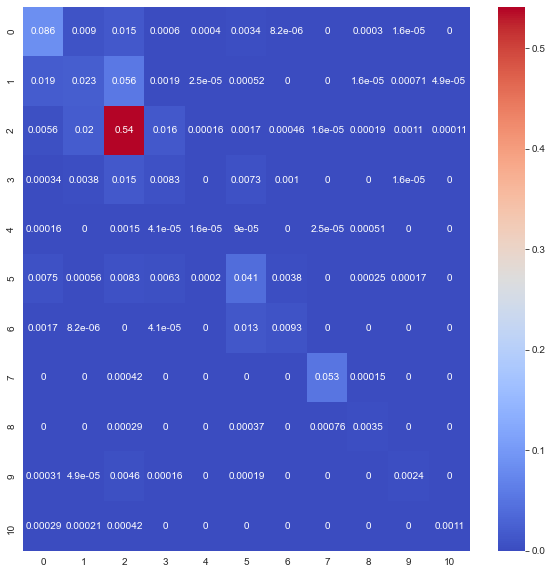

time: 594 ms (started: 2021-04-05 13:05:27 -05:00)


In [484]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(np.vectorize(lithology_numbers.get)(y_hidden.values),predictions, normalize='all'), cmap = 'coolwarm', annot = True)

In [480]:
print(classification_report(np.vectorize(lithology_numbers.get)(y_hidden.values),predictions))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73     14045
           1       0.40      0.22      0.29     12283
           2       0.84      0.92      0.88     71827
           3       0.25      0.23      0.24      4396
           4       0.02      0.01      0.01       287
           5       0.61      0.60      0.61      8374
           6       0.64      0.39      0.48      2905
           7       0.98      0.99      0.99      6498
           8       0.71      0.71      0.71       597
           9       0.54      0.31      0.39       941
          10       0.87      0.54      0.67       244

    accuracy                           0.77    122397
   macro avg       0.60      0.52      0.54    122397
weighted avg       0.74      0.77      0.75    122397

time: 78 ms (started: 2021-04-05 13:03:33 -05:00)









# Using Neural Networks to see if we get a better accuracy

In [337]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping

time: 0 ns (started: 2021-04-04 22:19:20 -05:00)


# Build NN
Our case is mutually exclusive multiclass classification problem. The output layer need to have the same number of neurons as the number of classes. and we need use softmax as the activation function to calculate probabilities of all the target classes.

In [485]:
model = Sequential()

# input layer
model.add(Dense(15,  activation='relu'))
# model.add(Dropout(0.2))

# hidden layer
model.add(Dense(10, activation='relu'))
# model.add(Dropout(0.2))

# hidden layer
model.add(Dense(6, activation='relu'))
# model.add(Dropout(0.2))

# output layer
model.add(Dense(12,activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = 'accuracy')

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=25, verbose=1, restore_best_weights=True)

# mcp_save = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5', save_best_only= True, monitor='val_loss', mode='min')
# reduce_lr_loss = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=10, verbose=1, min_delta=1e-4, mode='min')

time: 16 ms (started: 2021-04-05 13:06:26 -05:00)


# Scale and condition the dataset

In [486]:
pipeline_nn = Pipeline(steps=[('s',scaler),('i', imputer)])

X_nn = pipeline_nn.fit_transform(X)
X_test_nn = pipeline_nn.transform(X_test)
X_hidden = pipeline_nn.transform(df_hidden)

y_nn = y.map(lithology_numbers)
y_test_nn = y_test.map(lithology_numbers)
y_hidden_nn = y_hidden.map(lithology_numbers)

time: 1min 43s (started: 2021-04-05 13:06:28 -05:00)


# Fitting the NN

In [487]:
model.fit(X_nn,y_nn,validation_data=(X_test_nn,y_test_nn),callbacks = monitor, verbose=2,epochs=100)

Epoch 1/100
36579/36579 - 50s - loss: 0.7650 - accuracy: 0.7481 - val_loss: 0.8688 - val_accuracy: 0.7222
Epoch 2/100
36579/36579 - 50s - loss: 0.6805 - accuracy: 0.7725 - val_loss: 0.8599 - val_accuracy: 0.7349
Epoch 3/100
36579/36579 - 50s - loss: 0.6641 - accuracy: 0.7776 - val_loss: 0.8690 - val_accuracy: 0.7184
Epoch 4/100
36579/36579 - 51s - loss: 0.6473 - accuracy: 0.7839 - val_loss: 0.8507 - val_accuracy: 0.7300
Epoch 5/100
36579/36579 - 51s - loss: 0.6393 - accuracy: 0.7865 - val_loss: 0.8592 - val_accuracy: 0.7318
Epoch 6/100
36579/36579 - 52s - loss: 0.6339 - accuracy: 0.7885 - val_loss: 0.8394 - val_accuracy: 0.7347
Epoch 7/100
36579/36579 - 50s - loss: 0.6295 - accuracy: 0.7897 - val_loss: 0.8665 - val_accuracy: 0.7336
Epoch 8/100
36579/36579 - 50s - loss: 0.6274 - accuracy: 0.7909 - val_loss: 0.8518 - val_accuracy: 0.7377
Epoch 9/100
36579/36579 - 52s - loss: 0.6228 - accuracy: 0.7922 - val_loss: 0.8634 - val_accuracy: 0.7298
Epoch 10/100
36579/36579 - 50s - loss: 0.6200 

time: 29min 56s (started: 2021-04-05 13:08:11 -05:00)


# Calculating the score for the leaderboard dataset

In [488]:
predictions = model.predict(X_test_nn)
print(f"The Open Leaderboard score is {score(y_test_nn,np.argmax(predictions,axis=1))}")

The Open Leaderboard score is -0.6853926936967234
time: 2.33 s (started: 2021-04-05 13:38:07 -05:00)


# Calculating score for the hidden dataset

In [489]:
predictions = model.predict(X_hidden)
print(f"The Hidden Leaderboard score is {score(y_hidden_nn,np.argmax(predictions,axis=1))}")

The Hidden Leaderboard score is -0.8177171417600104
time: 2.03 s (started: 2021-04-05 13:38:10 -05:00)


# Evaluating the model

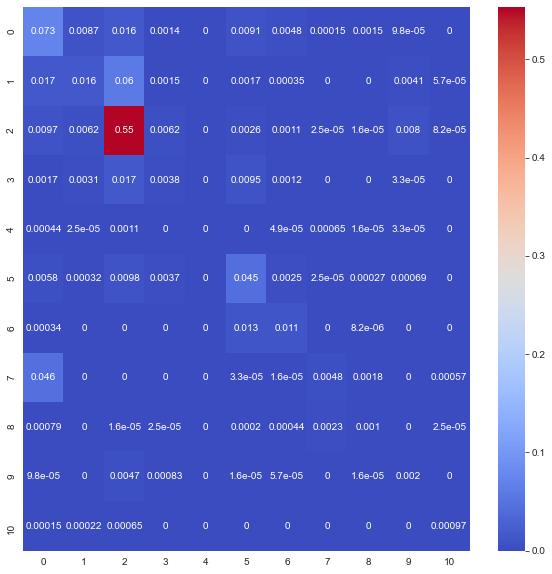

time: 563 ms (started: 2021-04-05 13:38:12 -05:00)


In [490]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_hidden_nn,np.argmax(predictions,axis=1), normalize='all'), cmap = 'coolwarm', annot = True)

In [492]:
print(classification_report(y_hidden_nn,np.argmax(predictions,axis=1)))

              precision    recall  f1-score   support

           0       0.47      0.64      0.54     14045
           1       0.46      0.16      0.23     12283
           2       0.84      0.94      0.89     71827
           3       0.22      0.11      0.14      4396
           4       0.00      0.00      0.00       287
           5       0.56      0.66      0.61      8374
           6       0.51      0.46      0.48      2905
           7       0.60      0.09      0.16      6498
           8       0.23      0.21      0.22       597
           9       0.13      0.25      0.17       941
          10       0.57      0.49      0.53       244

    accuracy                           0.71    122397
   macro avg       0.42      0.36      0.36    122397
weighted avg       0.68      0.71      0.68    122397

time: 78 ms (started: 2021-04-05 13:38:13 -05:00)
